# Methods 2024
## Stats III: Bayesian statistics

Thursday, 9/26/24

In [37]:
# conda create -c conda-forge -n pymc "pymc>=5" numpyro seaborn matplotlib arviz numpy pandas scikit-learn scipy ipykernel

# OR on Colab

!pip install pymc>=5
!pip install arviz
!pip install numpy
!pip install ipympl

# then restart runtime

In [38]:
######################## new stuff ########################

import pymc as pm
# Pymc is a user-friendly Bayesian statistics package for Python

import arviz as az
# Arviz is a plotting package (built on matplotlib) meant for Bayesian statistics


######################## packages/modules we know ########################

from io import StringIO

from sklearn import linear_model
# for frequentist linear regressions

from scipy import stats
# scipy.stats has methods for drawing distributions

import numpy as np
# numpy is our main "mathematics" engine

import pandas as pd
# pandas is our dataframe package

from matplotlib import pyplot as plt
import seaborn as sns
# matplotlib.pyplot is our main plotting engine, while seaborn is built upon matplotlib
# and has a lot of specific functionality

%config InlineBackend.figure_format='retina'
%matplotlib inline

Let's use the waffles dataframe.

In [39]:
waffles = pd.read_json(
    StringIO('{"Location":{"0":"Alabama","1":"Alaska","2":"Arizona","3":"Arkansas","4":"California","5":"Colorado","6":"Connecticut","7":"Delaware","8":"District of Columbia","9":"Florida","10":"Georgia","11":"Hawaii","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minnesota","24":"Mississippi","25":"Missouri","26":"Montana","27":"Nebraska","28":"New Hampshire","29":"New Jersey","30":"New Mexico","31":"New York","32":"North Carolina","33":"North Dakota","34":"Ohio","35":"Oklahoma","36":"Oregon","37":"Pennsylvania","38":"Rhode Island","39":"South Carolina","40":"South Dakota","41":"Tennessee","42":"Texas","43":"Utah","44":"Vermont","45":"Virginia","46":"Washington","47":"West Virginia","48":"Wisconsin","49":"Wyoming"},"Population":{"0":4.78,"1":0.71,"2":6.33,"3":2.92,"4":37.25,"5":5.03,"6":3.57,"7":0.9,"8":0.6,"9":18.8,"10":9.69,"11":1.36,"12":1.57,"13":12.83,"14":6.48,"15":3.05,"16":2.85,"17":4.34,"18":4.53,"19":1.33,"20":5.77,"21":6.55,"22":9.88,"23":5.3,"24":2.97,"25":5.99,"26":0.99,"27":1.83,"28":1.32,"29":8.79,"30":2.06,"31":19.38,"32":9.54,"33":0.67,"34":11.54,"35":3.75,"36":3.83,"37":12.7,"38":1.05,"39":4.63,"40":0.81,"41":6.35,"42":25.15,"43":2.76,"44":0.63,"45":8.0,"46":6.72,"47":1.85,"48":5.69,"49":0.56},"MedianAgeMarriage":{"0":25.3,"1":25.2,"2":25.8,"3":24.3,"4":26.8,"5":25.7,"6":27.6,"7":26.6,"8":29.7,"9":26.4,"10":25.9,"11":26.9,"12":23.2,"13":27.0,"14":25.7,"15":25.4,"16":25.0,"17":24.8,"18":25.9,"19":26.4,"20":27.3,"21":28.5,"22":26.4,"23":26.3,"24":25.8,"25":25.6,"26":25.7,"27":25.4,"28":26.8,"29":27.7,"30":25.8,"31":28.4,"32":25.7,"33":25.3,"34":26.3,"35":24.4,"36":26.0,"37":27.1,"38":28.2,"39":26.4,"40":25.6,"41":25.2,"42":25.2,"43":23.3,"44":26.9,"45":26.4,"46":25.9,"47":25.0,"48":26.3,"49":24.2},"Marriage":{"0":20.2,"1":26.0,"2":20.3,"3":26.4,"4":19.1,"5":23.5,"6":17.1,"7":23.1,"8":17.7,"9":17.0,"10":22.1,"11":24.9,"12":25.8,"13":17.9,"14":19.8,"15":21.5,"16":22.1,"17":22.2,"18":20.6,"19":13.5,"20":18.3,"21":15.8,"22":16.5,"23":15.3,"24":19.3,"25":18.6,"26":18.5,"27":19.6,"28":16.7,"29":14.8,"30":20.4,"31":16.8,"32":20.4,"33":26.7,"34":16.9,"35":23.8,"36":18.9,"37":15.5,"38":15.0,"39":18.1,"40":20.1,"41":19.4,"42":21.5,"43":29.6,"44":16.4,"45":20.5,"46":21.4,"47":22.2,"48":17.2,"49":30.7},"Divorce":{"0":12.7,"1":12.5,"2":10.8,"3":13.5,"4":8.0,"5":11.6,"6":6.7,"7":8.9,"8":6.3,"9":8.5,"10":11.5,"11":8.3,"12":7.7,"13":8.0,"14":11.0,"15":10.2,"16":10.6,"17":12.6,"18":11.0,"19":13.0,"20":8.8,"21":7.8,"22":9.2,"23":7.4,"24":11.1,"25":9.5,"26":9.1,"27":8.8,"28":10.1,"29":6.1,"30":10.2,"31":6.6,"32":9.9,"33":8.0,"34":9.5,"35":12.8,"36":10.4,"37":7.7,"38":9.4,"39":8.1,"40":10.9,"41":11.4,"42":10.0,"43":10.2,"44":9.6,"45":8.9,"46":10.0,"47":10.9,"48":8.3,"49":10.3},"WaffleHouses":{"0":128,"1":0,"2":18,"3":41,"4":0,"5":11,"6":0,"7":3,"8":0,"9":133,"10":381,"11":0,"12":0,"13":2,"14":17,"15":0,"16":6,"17":64,"18":66,"19":0,"20":11,"21":0,"22":0,"23":0,"24":72,"25":39,"26":0,"27":0,"28":0,"29":0,"30":2,"31":0,"32":142,"33":0,"34":64,"35":16,"36":0,"37":11,"38":0,"39":144,"40":0,"41":103,"42":99,"43":0,"44":0,"45":40,"46":0,"47":4,"48":0,"49":0}}')
)

waffles.head()


Location  Population  MedianAgeMarriage  Marriage  Divorce  WaffleHouses
0     Alabama        4.78               25.3      20.2     12.7           128
1      Alaska        0.71               25.2      26.0     12.5             0
2     Arizona        6.33               25.8      20.3     10.8            18
3    Arkansas        2.92               24.3      26.4     13.5            41
4  California       37.25               26.8      19.1      8.0             0

Some specific information on our variables:
* `population` is population in millions
* `WaffleHouses` number of Waffle Houses in the state
* `Marriage` and `Divorce` are rates per 1000 people

## Running our Bayesian regression model

Let's analyze if the divorce rate can predict the number of Waffle Houses in a state.

In [40]:
# Let's extract our data

x_raw = waffles['WaffleHouses'].values
y_raw = waffles['Divorce'].values

x_norm = (x_raw - np.mean(x_raw)) / np.std(x_raw)
y_norm = (y_raw - np.mean(y_raw)) / np.std(y_raw)

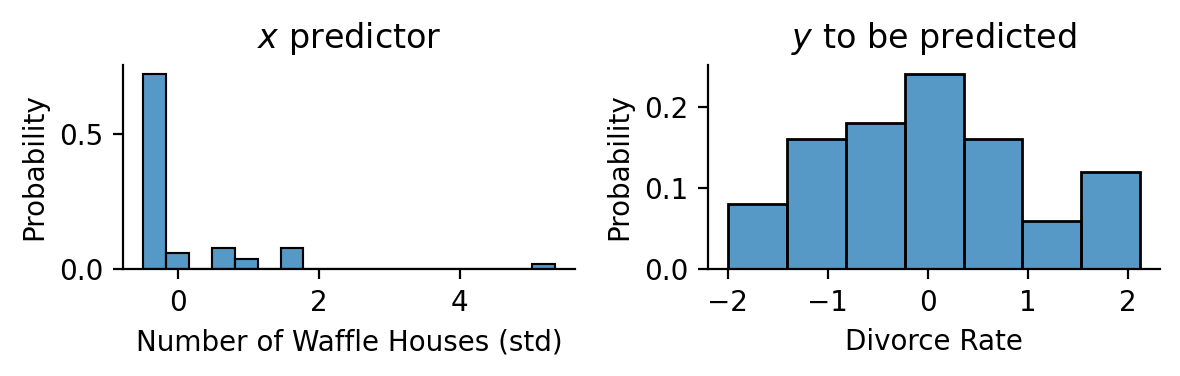

In [41]:
# Let's viz our variables

fig, axes = plt.subplots(figsize=(6, 2), ncols=2)
axes = axes.reshape(-1)

sns.histplot(x_norm, ax=axes[0], stat="probability")
sns.histplot(y_norm, ax=axes[1], stat="probability")

axes[0].set_xlabel("Number of Waffle Houses (std)")
axes[1].set_xlabel("Divorce Rate")

axes[0].set_title("$x$ predictor")
axes[1].set_title("$y$ to be predicted")

sns.despine()
plt.tight_layout()

In [42]:
# Let's build our model

with pm.Model() as model:

    # Define random variable priors (ez)
    m = pm.Normal("m", 0, 1)
    b = pm.Normal("b", 0, 1)
    sigma = pm.Exponential("sigma", 1)

    # Define your likelihood function
    u = pm.Deterministic('mu', m * x_norm + b)
    obs = pm.Normal("y", u, sigma, observed=y_norm)

    # Run MCMC sampling
    trace_model1 = pm.sample(draws=5000, tune=1000, chains=2, cores=1)


Output()

Output()

## Analyzing our model results

In [43]:
# analyze your "trace_model1" - your model results


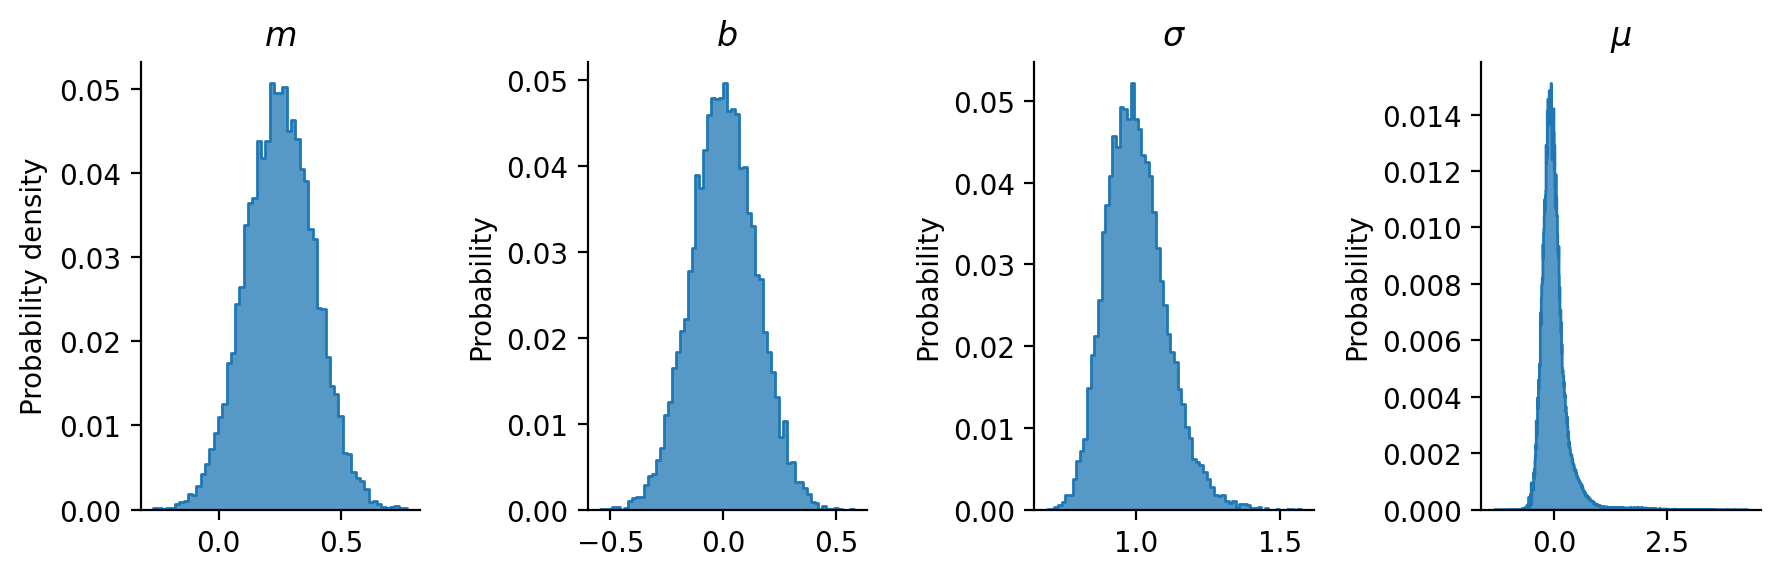

In [44]:
fig, axes = plt.subplots(figsize=(9,3), ncols=4)

sns.histplot(trace_model1.posterior['m'].values.reshape(-1), ax=axes[0], stat='probability', element='step')
sns.histplot(trace_model1.posterior['b'].values.reshape(-1), ax=axes[1], stat='probability', element='step')
sns.histplot(trace_model1.posterior['sigma'].values.reshape(-1), ax=axes[2], stat='probability', element='step')

sns.histplot(trace_model1.posterior['mu'].values.reshape(-1), ax=axes[3], stat='probability', element='step')

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[3].set_title("$\mu$")

axes[0].set_ylabel('Probability density')

sns.despine()
plt.tight_layout()

## Let's compare our prior to our posterior

In [45]:
#### Let's first generate what our prior was ####

# our prior for m, b
norm = stats.norm(loc=0, scale=1)
mb_x_range = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 50)
mb_y = norm.pdf(mb_x_range)

# our prior for sigma
exp = stats.expon(1)
sig_x_range = np.linspace(exp.ppf(0.01), exp.ppf(0.99), 50)
sig_y = exp.pdf(sig_x_range)

# simulating our prior for mu
rng = np.random.default_rng(11206)
mus = []
for i in range(1000):
    m = rng.normal(loc=0, scale=1)
    b = rng.normal(loc=0, scale=1)
    sig = rng.exponential(1)

    # here's a great example of list comprehension &
    # the list in-place function "list().extend"
    mus.extend([m * each_x + b for each_x in x_norm])

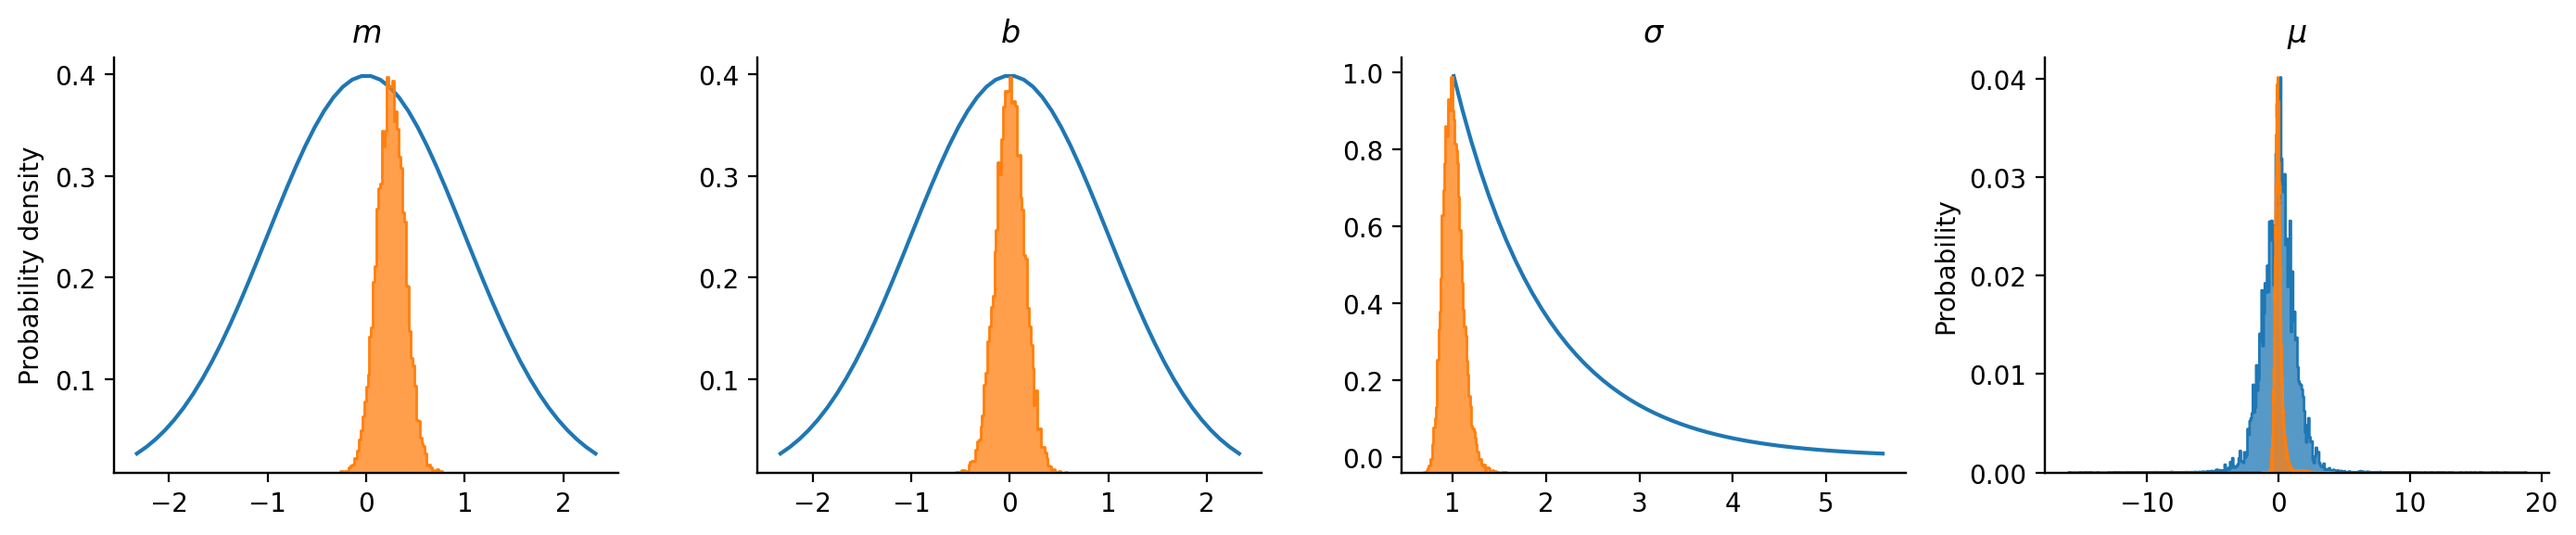

In [46]:
fig, axes = plt.subplots(figsize=(3.5*4, 3), ncols=4)

## First we'll plot the priors ##

axes[0].plot(mb_x_range, mb_y)
axes[1].plot(mb_x_range, mb_y)
axes[2].plot(sig_x_range, sig_y)

sns.histplot(
    mus,
    ax=axes[3],
    stat="probability",
    element="step",
    color="tab:blue",
)

ax_twins = [ax.twinx() for ax in axes]
[ax.set_yticks([]) for ax in ax_twins]  # list comp to apply function across twin axes

## Next we'll plot the posteriors ##

sns.histplot(
    trace_model1.posterior["m"].values.reshape(-1),
    ax=ax_twins[0],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model1.posterior["b"].values.reshape(-1),
    ax=ax_twins[1],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model1.posterior["sigma"].values.reshape(-1),
    ax=ax_twins[2],
    stat="probability",
    element="step",
    color="tab:orange",
)
sns.histplot(
    trace_model1.posterior["mu"].values.reshape(-1),
    ax=ax_twins[3],
    stat="probability",
    element="step",
    color="tab:orange",
)

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[3].set_title("$\mu$")
axes[0].set_ylabel("Probability density")


sns.despine()
plt.tight_layout()

Back to slides!

## Posterior Predictive Check


Our posterior

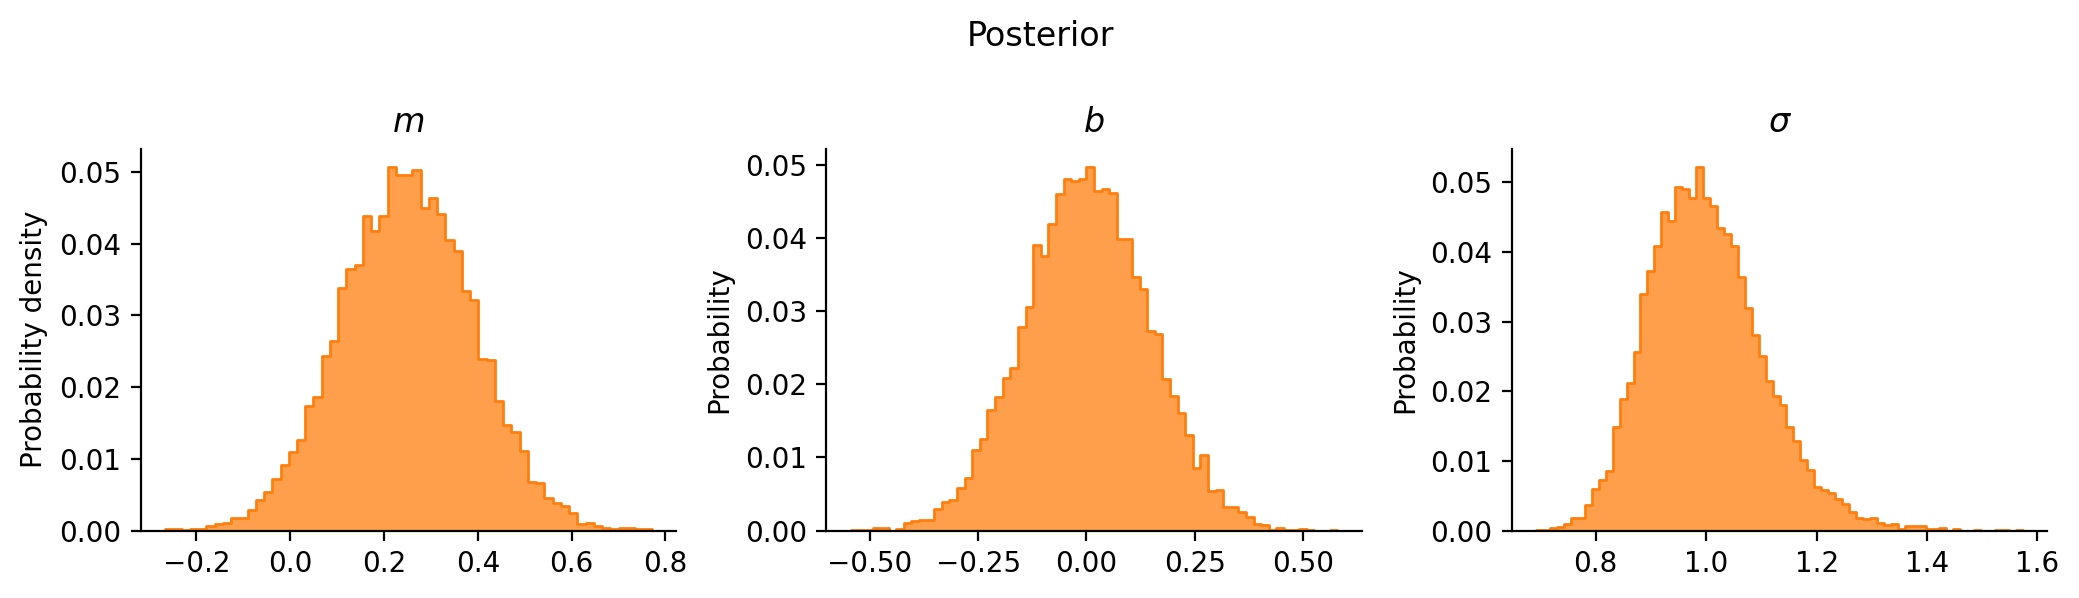

In [47]:
fig, axes = plt.subplots(figsize=(3.5 * 3, 3), ncols=3)

sns.histplot(
    trace_model1.posterior["m"].values.reshape(-1),
    ax=axes[0],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model1.posterior["b"].values.reshape(-1),
    ax=axes[1],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model1.posterior["sigma"].values.reshape(-1),
    ax=axes[2],
    stat="probability",
    element="step",
    color="tab:orange",
)

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[0].set_ylabel("Probability density")

fig.suptitle("Posterior")
sns.despine()
plt.tight_layout()


A posterior predictive check - using our posterior, what are the lines we can draw?

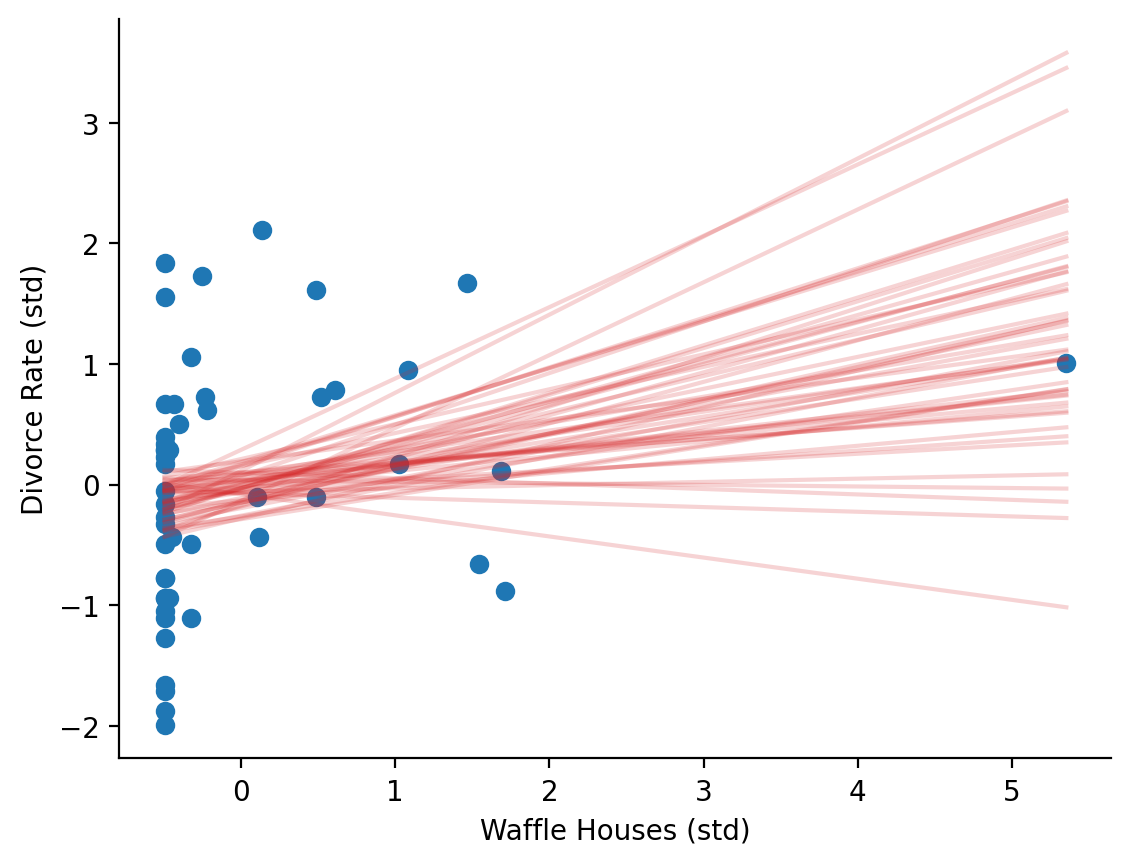

In [48]:
# need an x_range for our prediction lines
x_range = np.linspace(min(x_norm), max(x_norm), 100)

# choose 50 random iterations to plot from
rng = np.random.default_rng(77777)
selection = rng.integers(low=0, high=len(trace_model1.posterior["m"].values.reshape(-1)), size=50)

# linearize our posterior arrays
ms = trace_model1.posterior['m'].values.reshape(-1)
bs = trace_model1.posterior['b'].values.reshape(-1)

# plot!
fig, ax = plt.subplots()
ax.scatter(x_norm, y_norm)

for i in selection:

    m = ms[i]
    b = bs[i]

    y_pred = m * x_range + b
    ax.plot(x_range, y_pred, color="tab:red", alpha=0.2)

ax.set_xlabel('Waffle Houses (std)')
ax.set_ylabel('Divorce Rate (std)')
sns.despine()

For fun, let's look at what our prior would've predicted

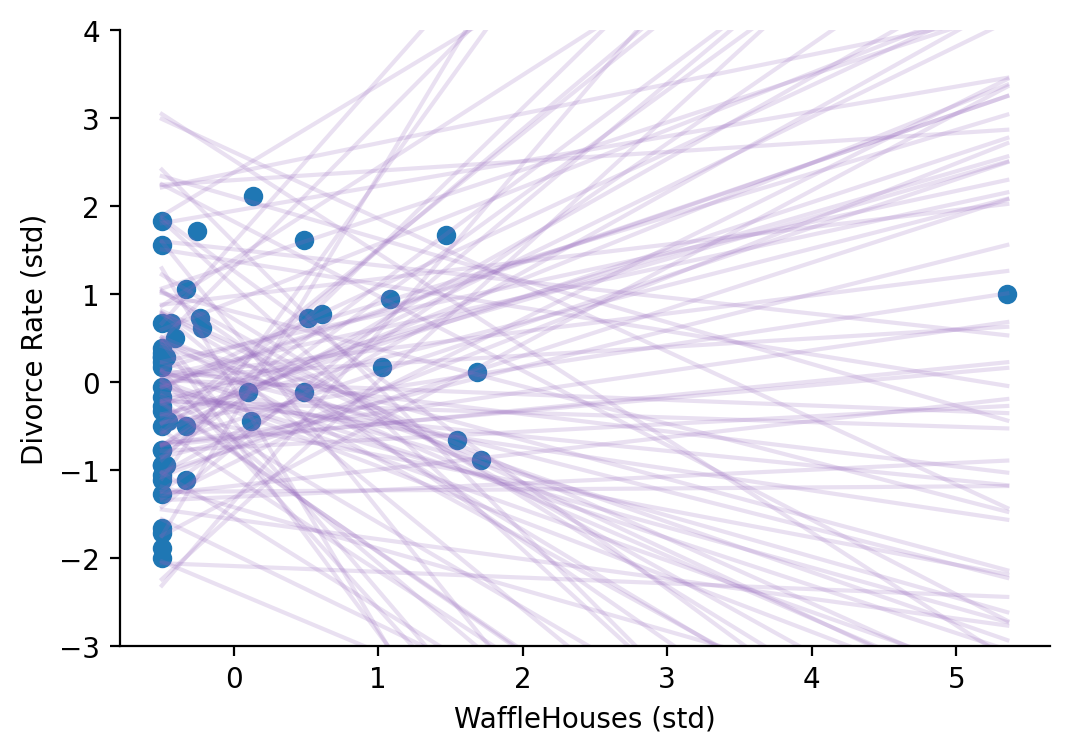

In [49]:

# seed a random number generator
rng = np.random.default_rng(11206)
ys = []  # container for our many lines
N_LINES = 100  # how many predictive lines to make

# This is the x component to our predictive y's
x_range = np.linspace(min(x_norm), max(x_norm), 50)

for i in range(N_LINES):

    # Select random m, b, sig from our priors
    m = rng.normal(loc=0, scale=1)
    b = rng.normal(loc=0, scale=1)
    sig = rng.exponential(1)

    y = m * x_range + b

    ys.append(y)


fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x_norm, y_norm)
for i in range(100):
    y = ys[i]
    ax.plot(x_range, y, color="tab:purple", alpha=0.2)


ax.set_xlabel("WaffleHouses (std)")
ax.set_ylabel("Divorce Rate (std)")


ax.set_ylim([-3, 4])

sns.despine()

## Using Arviz to generate a few important plots

### Trace Plot using `az.plot_trace()`

Allows us a way to visualize if our model was run correctly.


(Should've done this right after our MCMC sampling, but there was more improtant things to discuss for the flow of class.)

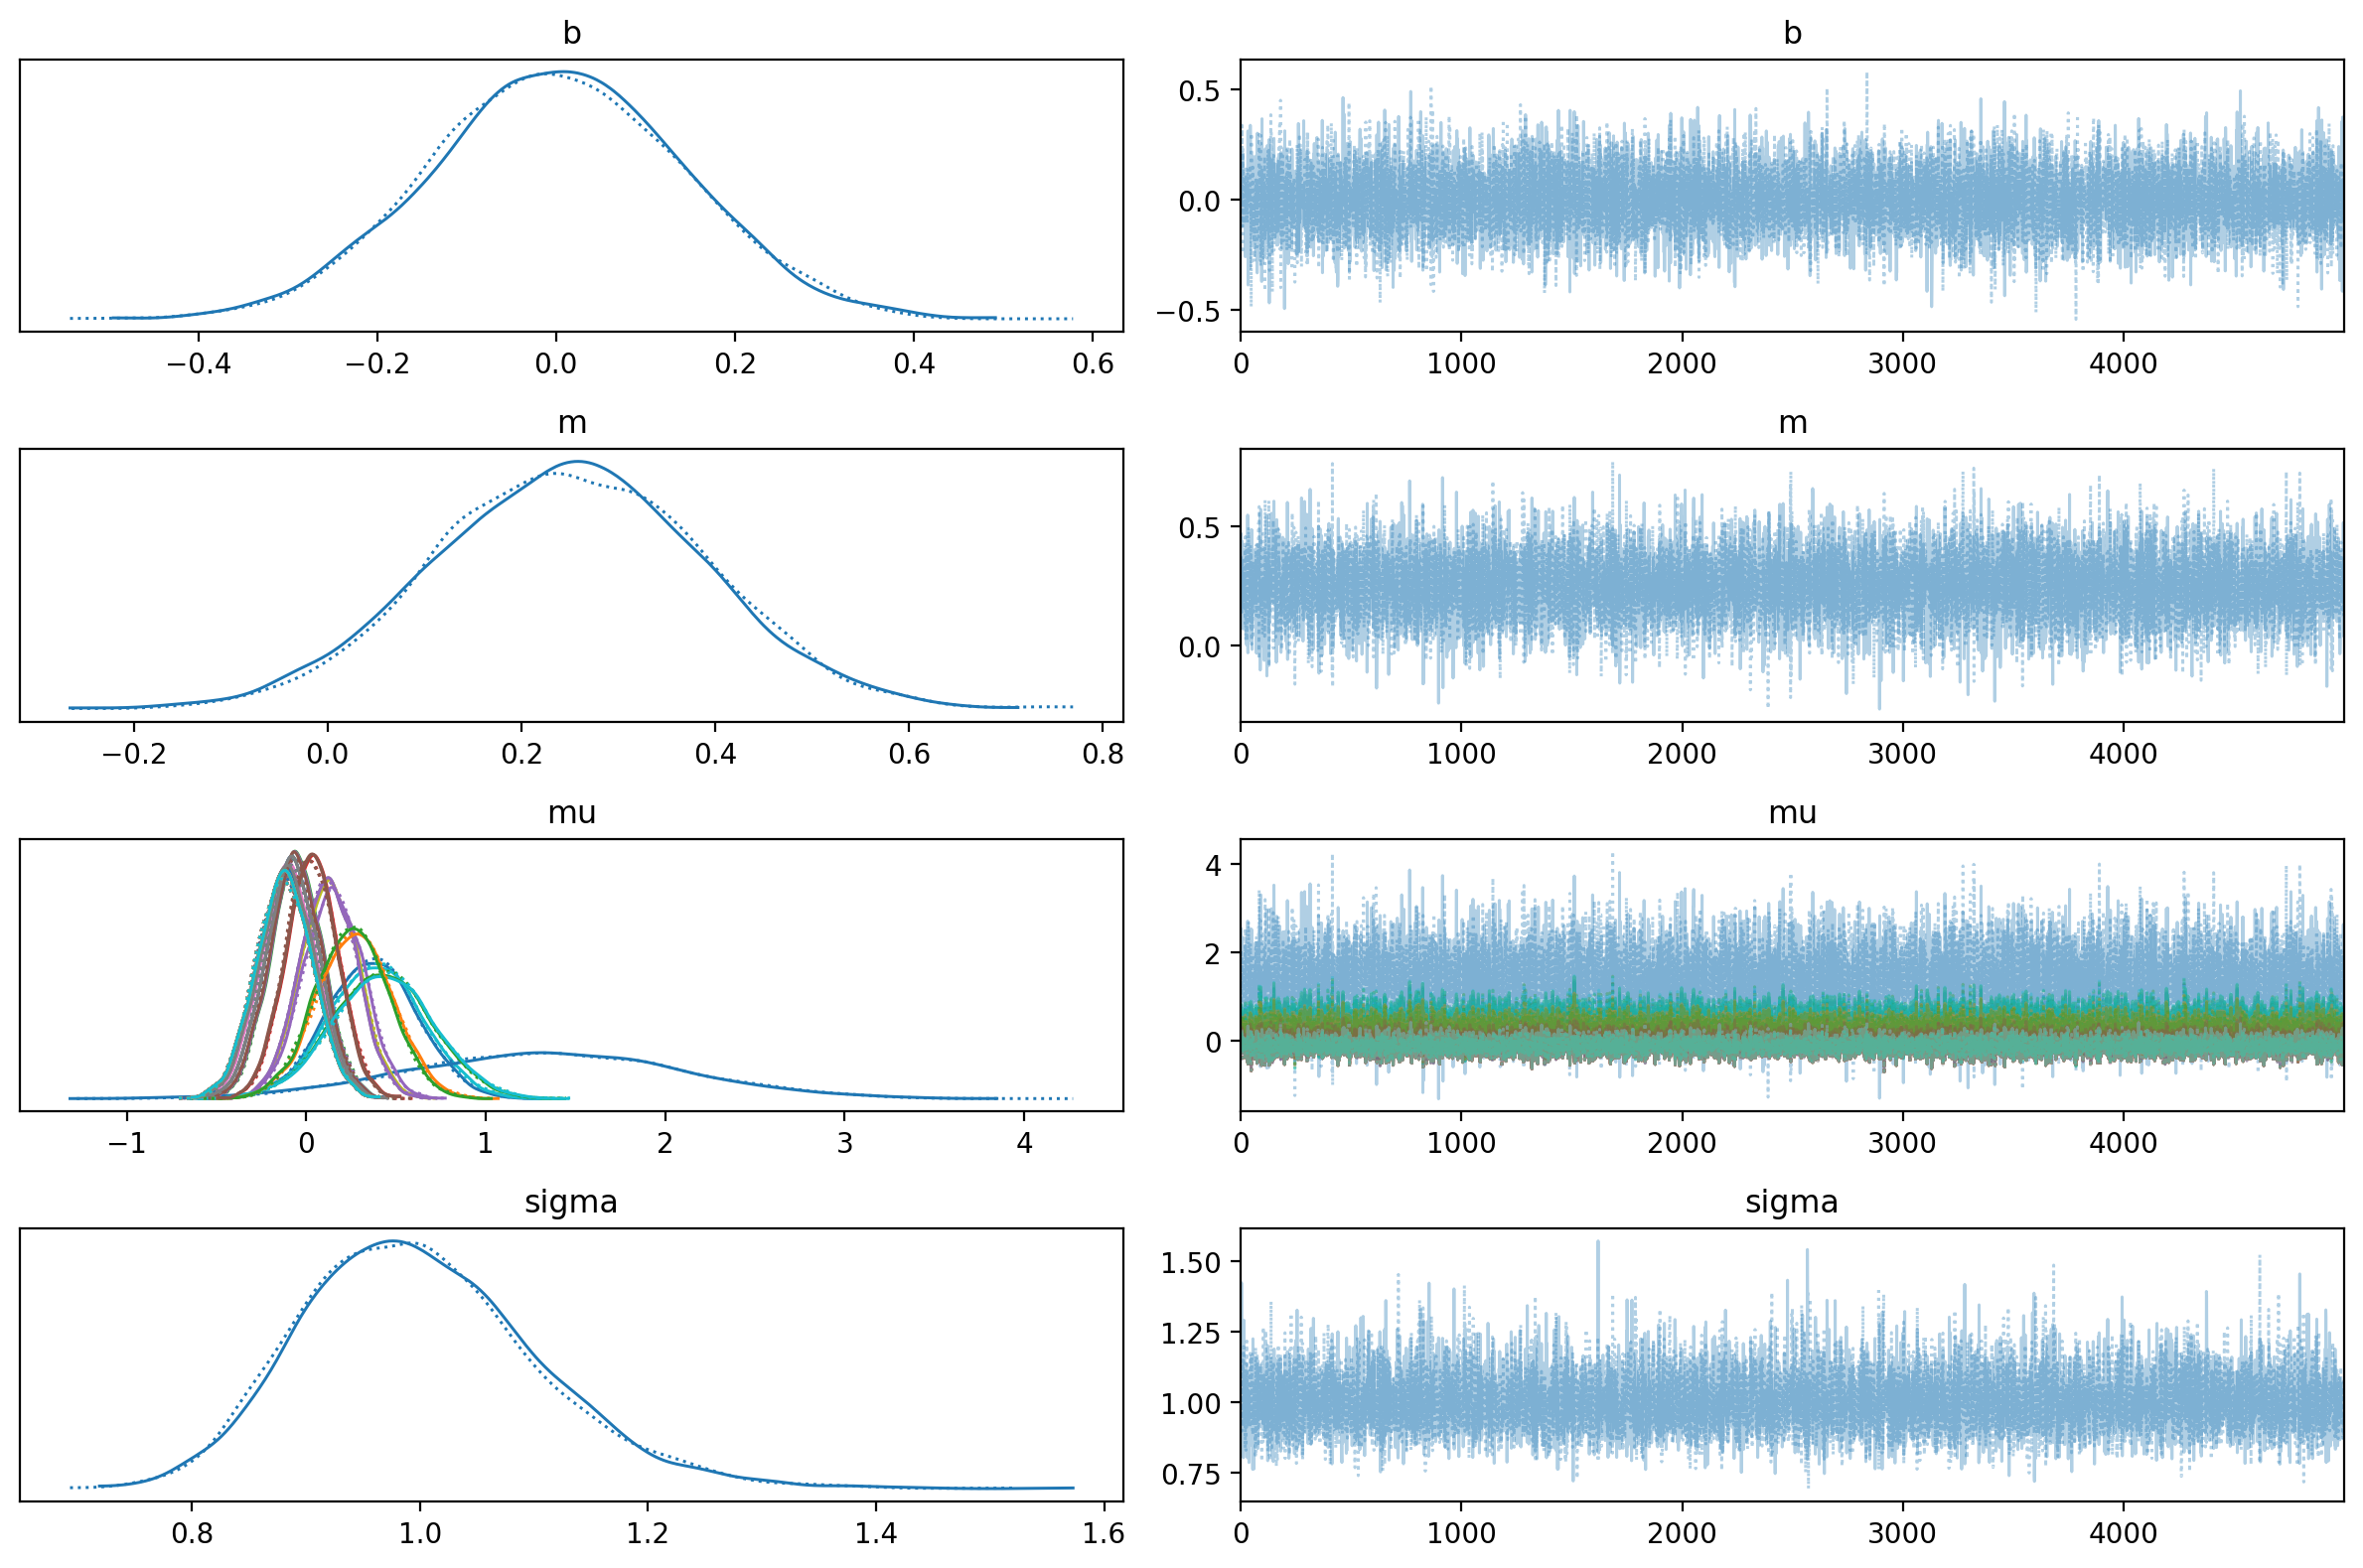

In [50]:
az.plot_trace(trace_model1)
# az.plot_trace(trace_model1, var_names='~mu')
# az.plot_trace(trace_model1, var_names=['m', 'b', 'sigma'])

# fig, axes = plt.subplots(figsize=(8, 6), ncols=2, nrows=3)
# az.plot_trace(trace_model1, var_names='~mu', axes=axes)

plt.tight_layout()


### Forest Plot using `az.plot_forest()`

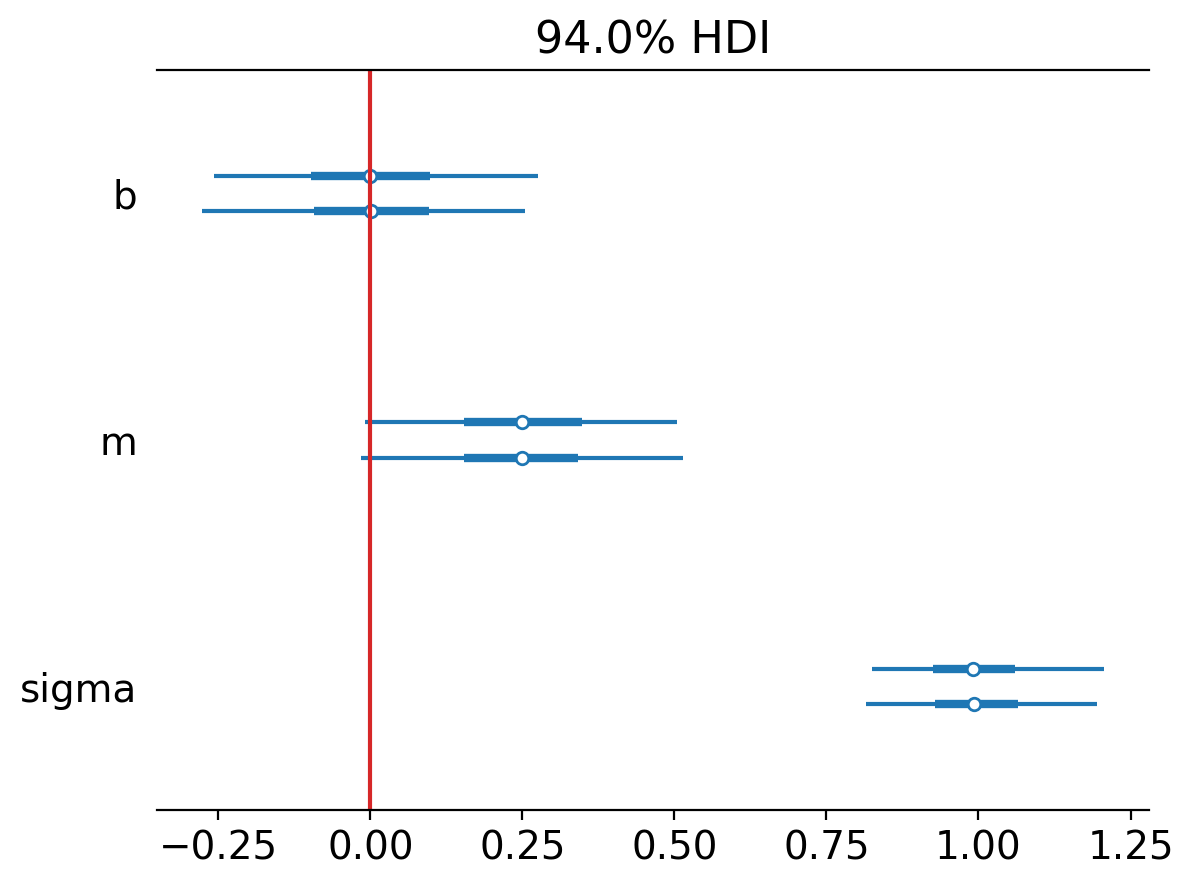

In [51]:
fig, ax = plt.subplots()

az.plot_forest(trace_model1, var_names='~mu', ax=ax)
# az.plot_forest(trace_model1, var_names='~mu', ax=ax, combined=True)

ax.axvline(0, color='tab:red')

### Plotting the posterior quickly using `az.plot_posterior()`

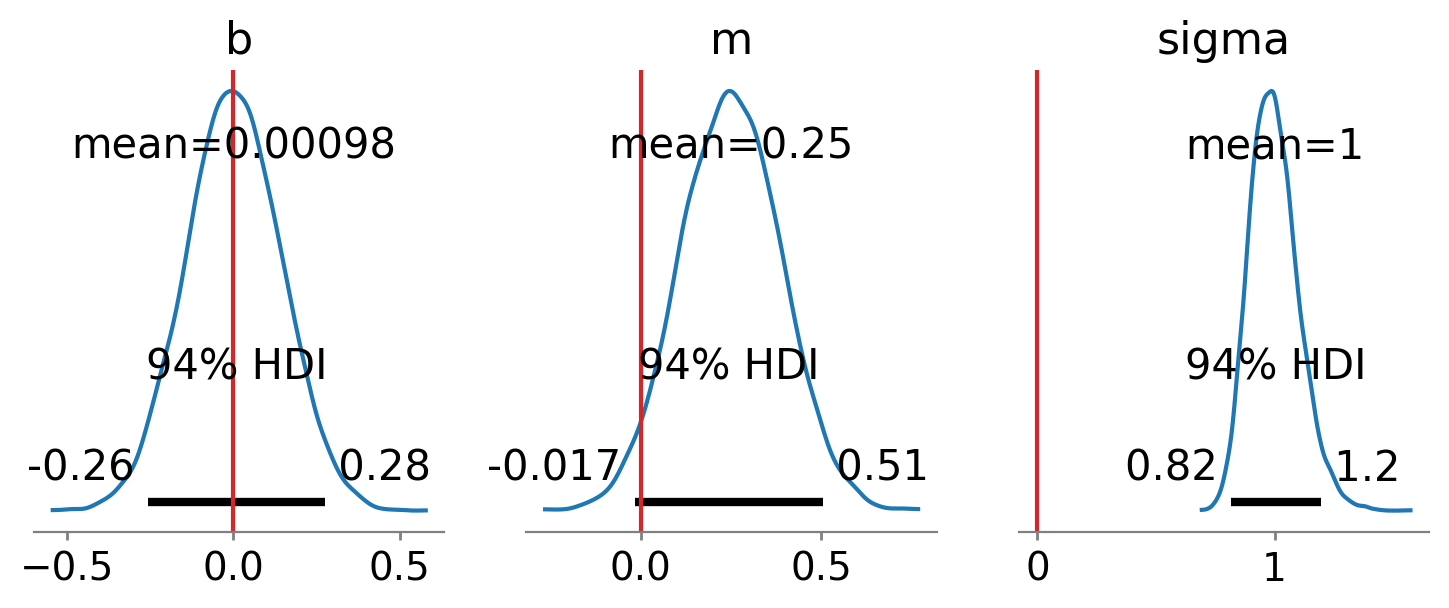

In [52]:
fig, axes = plt.subplots(figsize=(9, 3), ncols=3)

az.plot_posterior(trace_model1, var_names="~mu", ax=axes)

[ax.axvline(0, color="tab:red") for ax in axes];


## Quickly Checking A Better Predictor: `MedianAgeMarried`

How would our Bayesian regression go if we used a different variable?

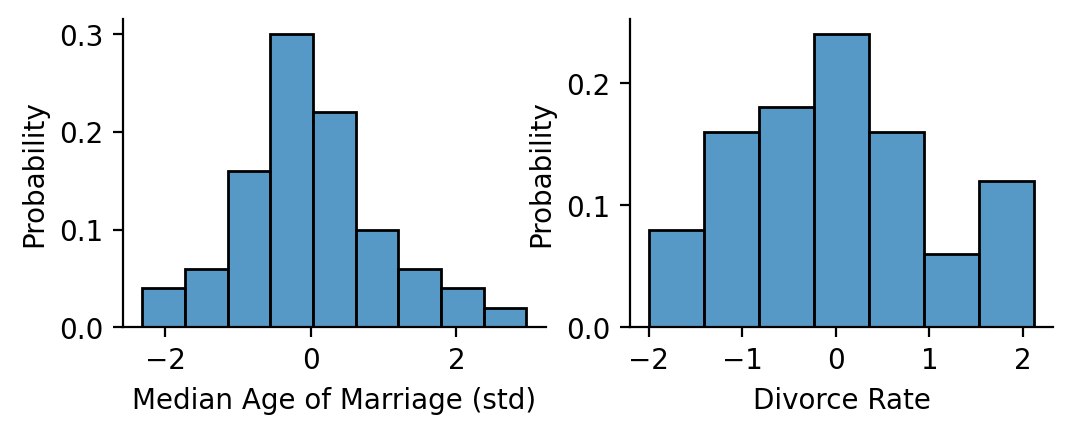

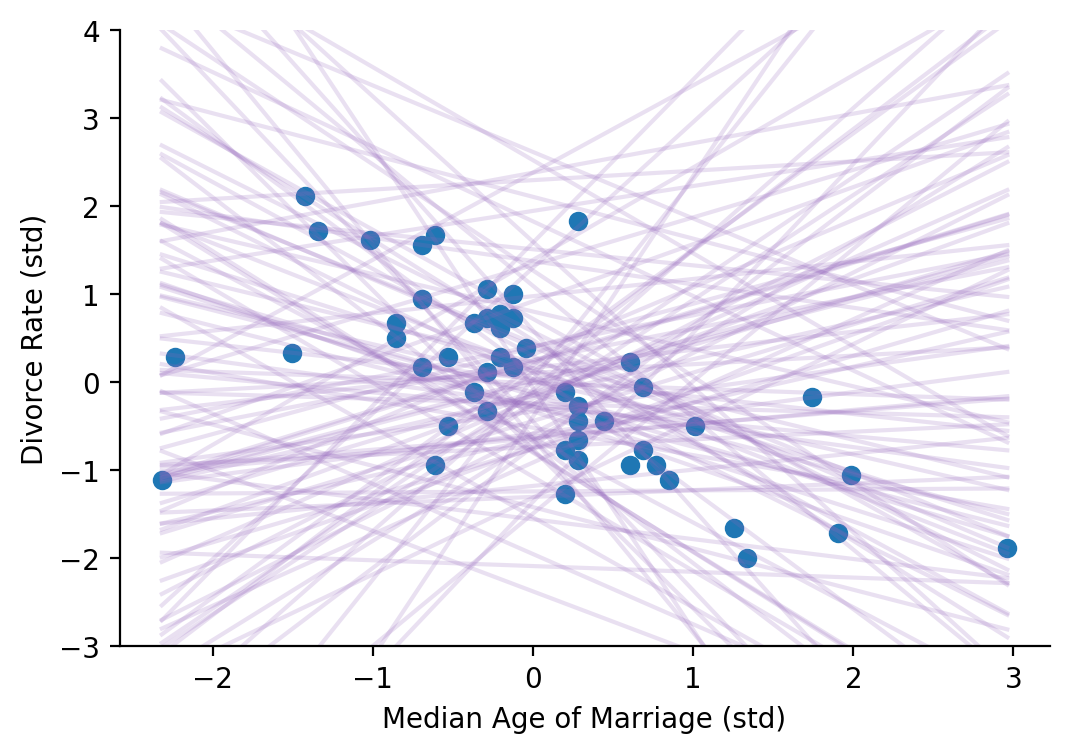

In [53]:
# Let's extract our data

x_raw = waffles["MedianAgeMarriage"].values
y_raw = waffles["Divorce"].values

x_norm = (x_raw - np.mean(x_raw)) / np.std(x_raw)
y_norm = (y_raw - np.mean(y_raw)) / np.std(y_raw)

# Let's viz our variables

fig, axes = plt.subplots(figsize=(6, 2), ncols=2)
axes = axes.reshape(-1)

sns.histplot(x_norm, ax=axes[0], stat="probability")
sns.histplot(y_norm, ax=axes[1], stat="probability")

axes[0].set_xlabel("Median Age of Marriage (std)")
axes[1].set_xlabel("Divorce Rate")

sns.despine()

############################################################

# seed a random number generator
rng = np.random.default_rng(11206)
ys = []  # container for our many lines
N_LINES = 100  # how many predictive lines to make

# This is the x component to our predictive y's
x_range = np.linspace(min(x_norm), max(x_norm), 50)

for i in range(N_LINES):

    # Select random m, b, sig from our priors
    m = rng.normal(loc=0, scale=1)
    b = rng.normal(loc=0, scale=1)
    sig = rng.exponential(1)

    y = m * x_range + b

    ys.append(y)


fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x_norm, y_norm)
for i in range(100):
    y = ys[i]
    ax.plot(x_range, y, color="tab:purple", alpha=0.2)


ax.set_xlabel("Median Age of Marriage (std)")
ax.set_ylabel("Divorce Rate (std)")


ax.set_ylim([-3, 4])

sns.despine()


In [54]:
# Let's build our model
with pm.Model() as model:

    # Define random variable priors (ez)
    m = pm.Normal("m", 0, 1)
    b = pm.Normal("b", 0, 1)
    sigma = pm.Exponential("sigma", 1)

    # Define your likelihood function
    u = pm.Deterministic('mu', m * x_norm + b)
    obs = pm.Normal("y", u, sigma, observed=y_norm)

    # Run MCMC sampling
    trace_model2 = pm.sample(return_inferencedata=True, draws=5000, tune=1000, chains=2, cores=1)

Output()

Output()

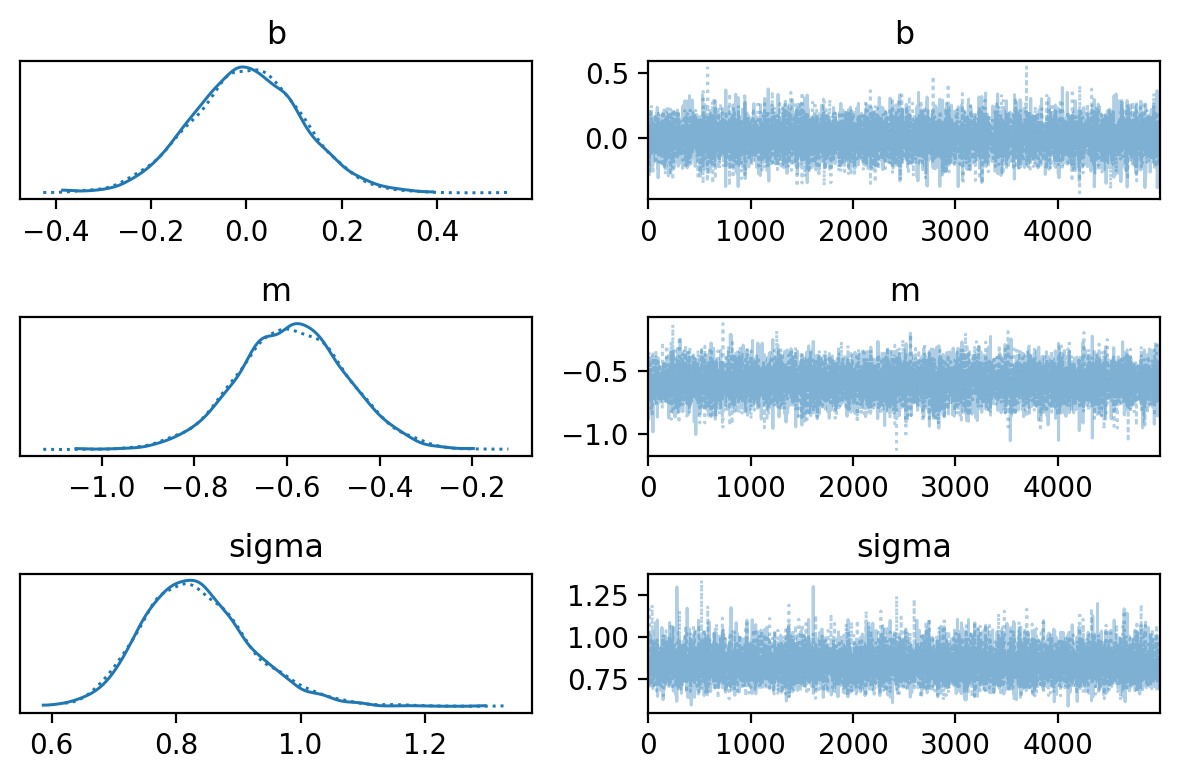

In [55]:
fig, axes = plt.subplots(figsize=(6, 4), ncols=2, nrows=3)
az.plot_trace(trace_model2, var_names='~mu', axes=axes)
plt.tight_layout()

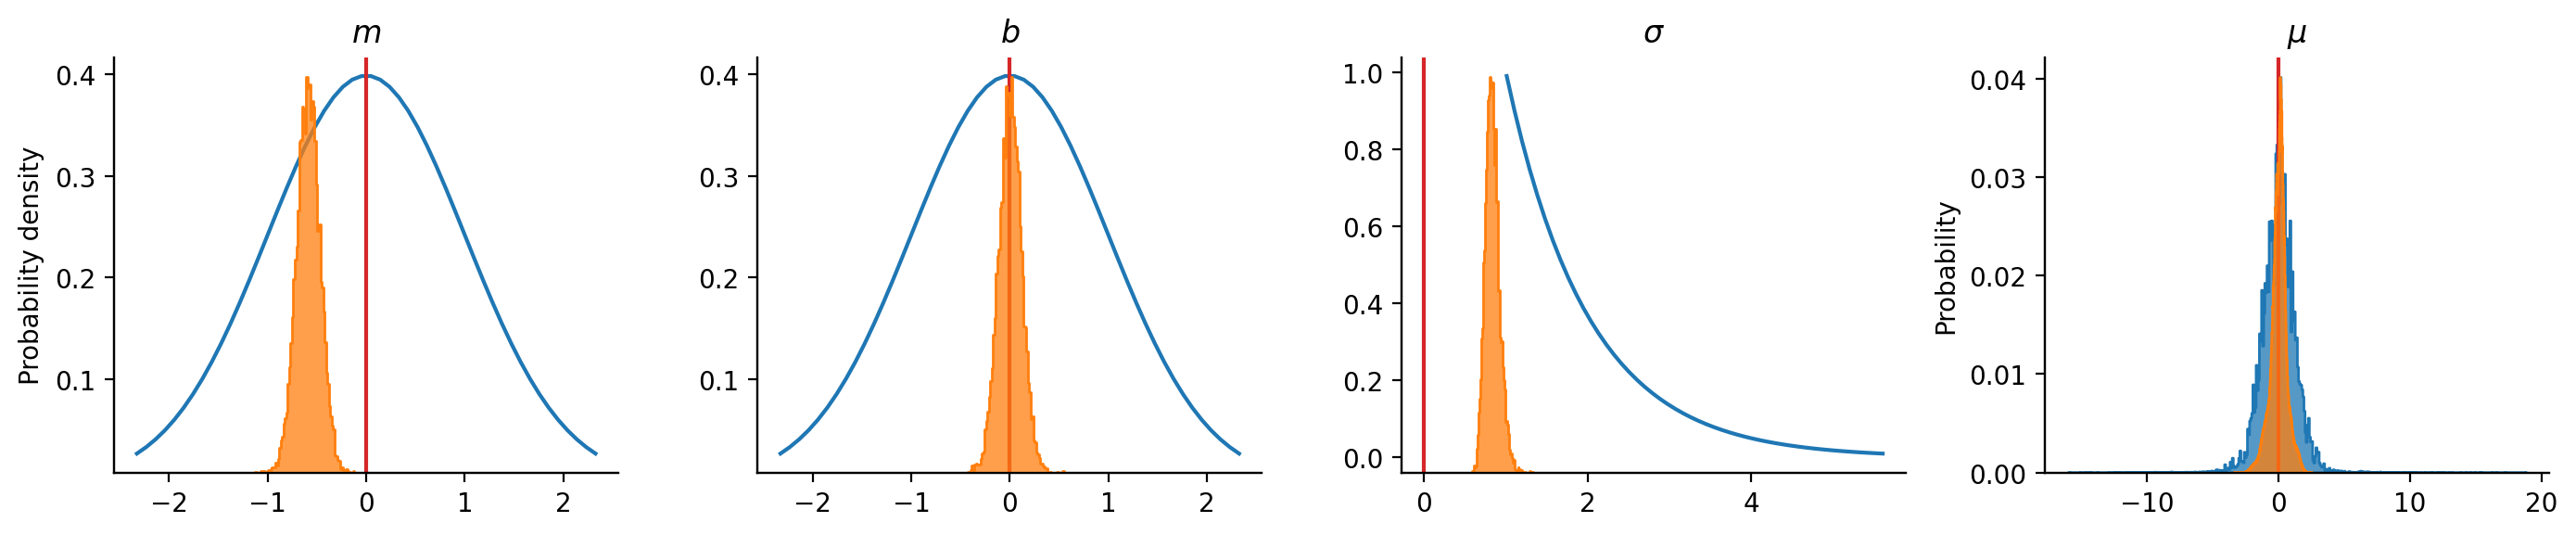

In [56]:
fig, axes = plt.subplots(figsize=(3.5*4, 3), ncols=4)

# We've used matplotlib "ax.plot" or "plt.plot" to do this in the past,
# so let's just use sns.lineplot for some diversity
sns.lineplot(x=mb_x_range, y=mb_y, ax=axes[0])
sns.lineplot(x=mb_x_range, y=mb_y, ax=axes[1])
sns.lineplot(x=sig_x_range, y=sig_y, ax=axes[2])

sns.histplot(
    mus,
    ax=axes[3],
    stat="probability",
    element="step",
    color="tab:blue",
)

ax_twins = [ax.twinx() for ax in axes]
[ax.set_yticks([]) for ax in ax_twins]  # list comp to apply function across twin axes

sns.histplot(
    trace_model2.posterior["m"].values.reshape(-1),
    ax=ax_twins[0],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model2.posterior["b"].values.reshape(-1),
    ax=ax_twins[1],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model2.posterior["sigma"].values.reshape(-1),
    ax=ax_twins[2],
    stat="probability",
    element="step",
    color="tab:orange",
)
sns.histplot(
    trace_model2.posterior["mu"].values.reshape(-1),
    ax=ax_twins[3],
    stat="probability",
    element="step",
    color="tab:orange",
)

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[3].set_title("$\mu$")
axes[0].set_ylabel("Probability density")

for ax in axes:
    ax.axvline(0, color='tab:red')

sns.despine()
plt.tight_layout()

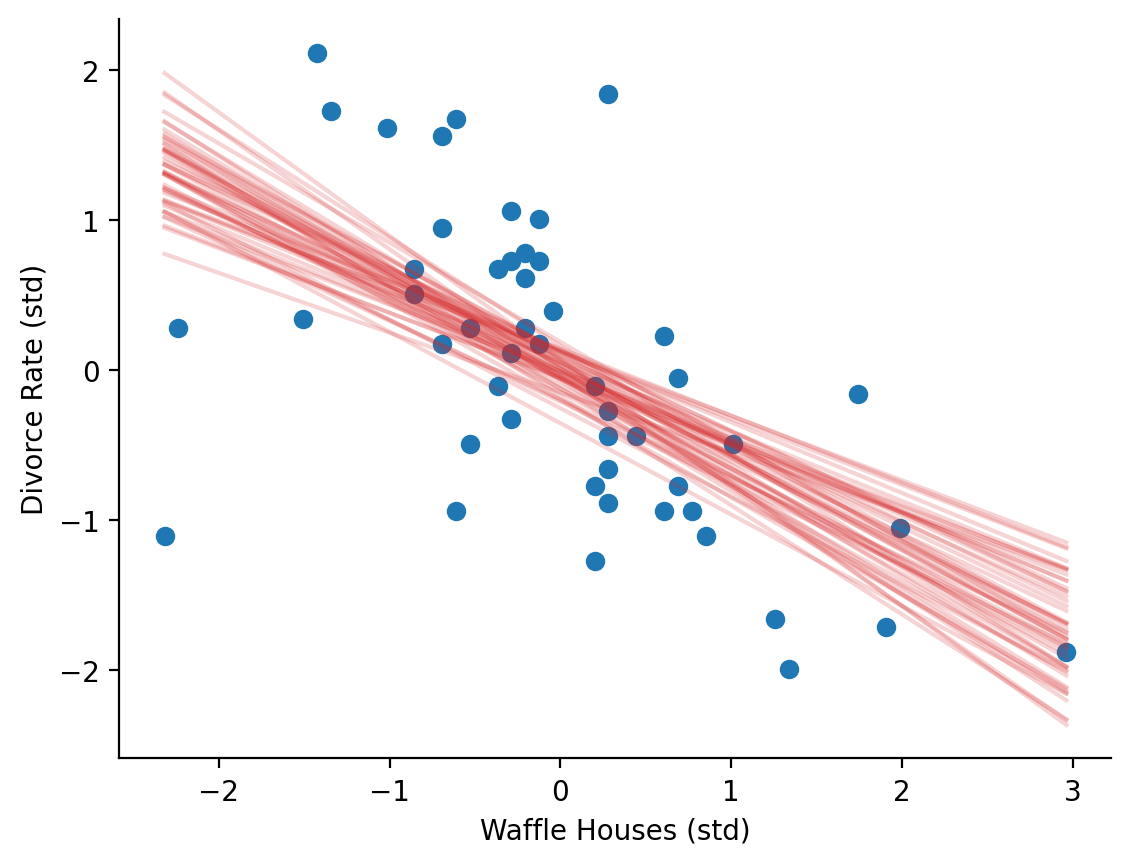

In [57]:
# need an x_range for our prediction lines
x_range = np.linspace(min(x_norm), max(x_norm), 100)

# choose 50 random iterations to plot from
rng = np.random.default_rng(6301)
selection = rng.integers(low=0, high=len(trace_model2.posterior["m"].values.reshape(-1)), size=50)

# linearize our posterior arrays
ms = trace_model2.posterior['m'].values.reshape(-1)
bs = trace_model2.posterior['b'].values.reshape(-1)

# plot!
fig, ax = plt.subplots()
ax.scatter(x_norm, y_norm)

for i in selection:

    m = ms[i]
    b = bs[i]

    y_pred = m * x_range + b
    ax.plot(x_range, y_pred, color="tab:red", alpha=0.2)

ax.set_xlabel('Waffle Houses (std)')
ax.set_ylabel('Divorce Rate (std)')
sns.despine()

## Bayesian Multiple Regression

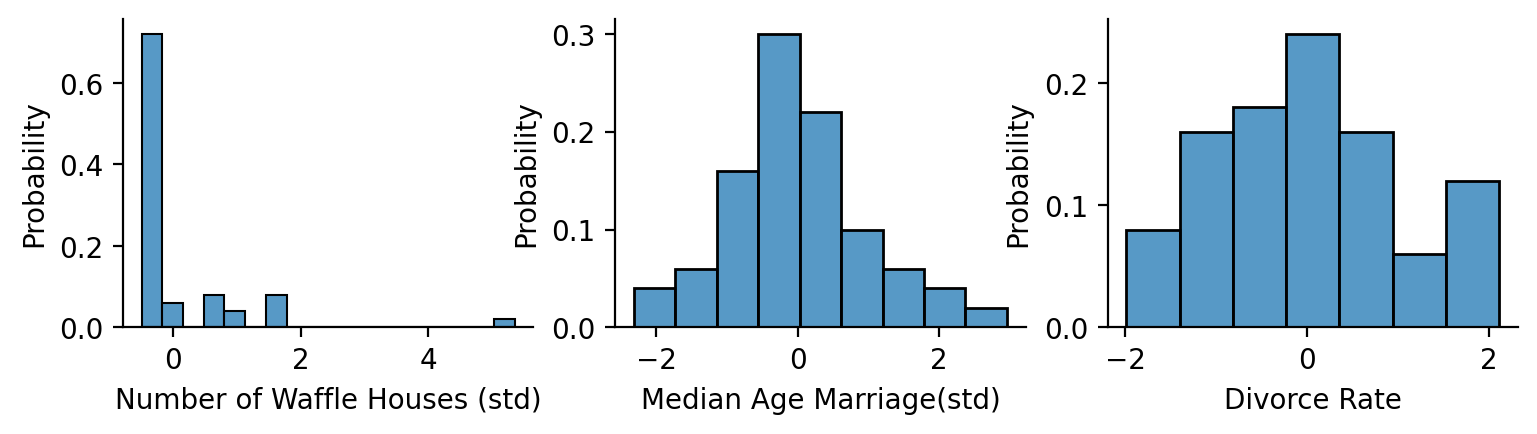

In [58]:
# Let's extract our data

x_raw_1 = waffles["WaffleHouses"].values
x_norm_1 = (x_raw_1 - np.mean(x_raw_1)) / np.std(x_raw_1)

x_raw_2 = waffles["MedianAgeMarriage"].values
x_norm_2 = (x_raw_2 - np.mean(x_raw_2)) / np.std(x_raw_2)

y_raw = waffles["Divorce"].values
y_norm = (y_raw - np.mean(y_raw)) / np.std(y_raw)

# Let's viz our variables

fig, axes = plt.subplots(figsize=(9, 2), ncols=3)
axes = axes.reshape(-1)

sns.histplot(x_norm_1, ax=axes[0], stat="probability")
sns.histplot(x_norm_2, ax=axes[1], stat="probability")
sns.histplot(y_norm, ax=axes[2], stat="probability")

axes[0].set_xlabel("Number of Waffle Houses (std)")
axes[1].set_xlabel("Median Age Marriage(std)")
axes[2].set_xlabel("Divorce Rate")

sns.despine()


In [59]:
# Let's build our model
with pm.Model() as model:

    # Define random variable priors (ez)
    m1 = pm.Normal("m1", 0, 1)
    m2 = pm.Normal("m2", 0, 1)
    b = pm.Normal("b", 0, 1)

    sigma = pm.Exponential("sigma", 1)

    # Define your likelihood function
    u = pm.Deterministic("mu", m1 * x_norm_1 + m2 * x_norm_2 + b)
    obs = pm.Normal("y", u, sigma, observed=y_norm)

    # Run MCMC sampling
    trace_model3 = pm.sample(return_inferencedata=True, draws=5000, tune=1000, chains=2, cores=1)


Output()

Output()

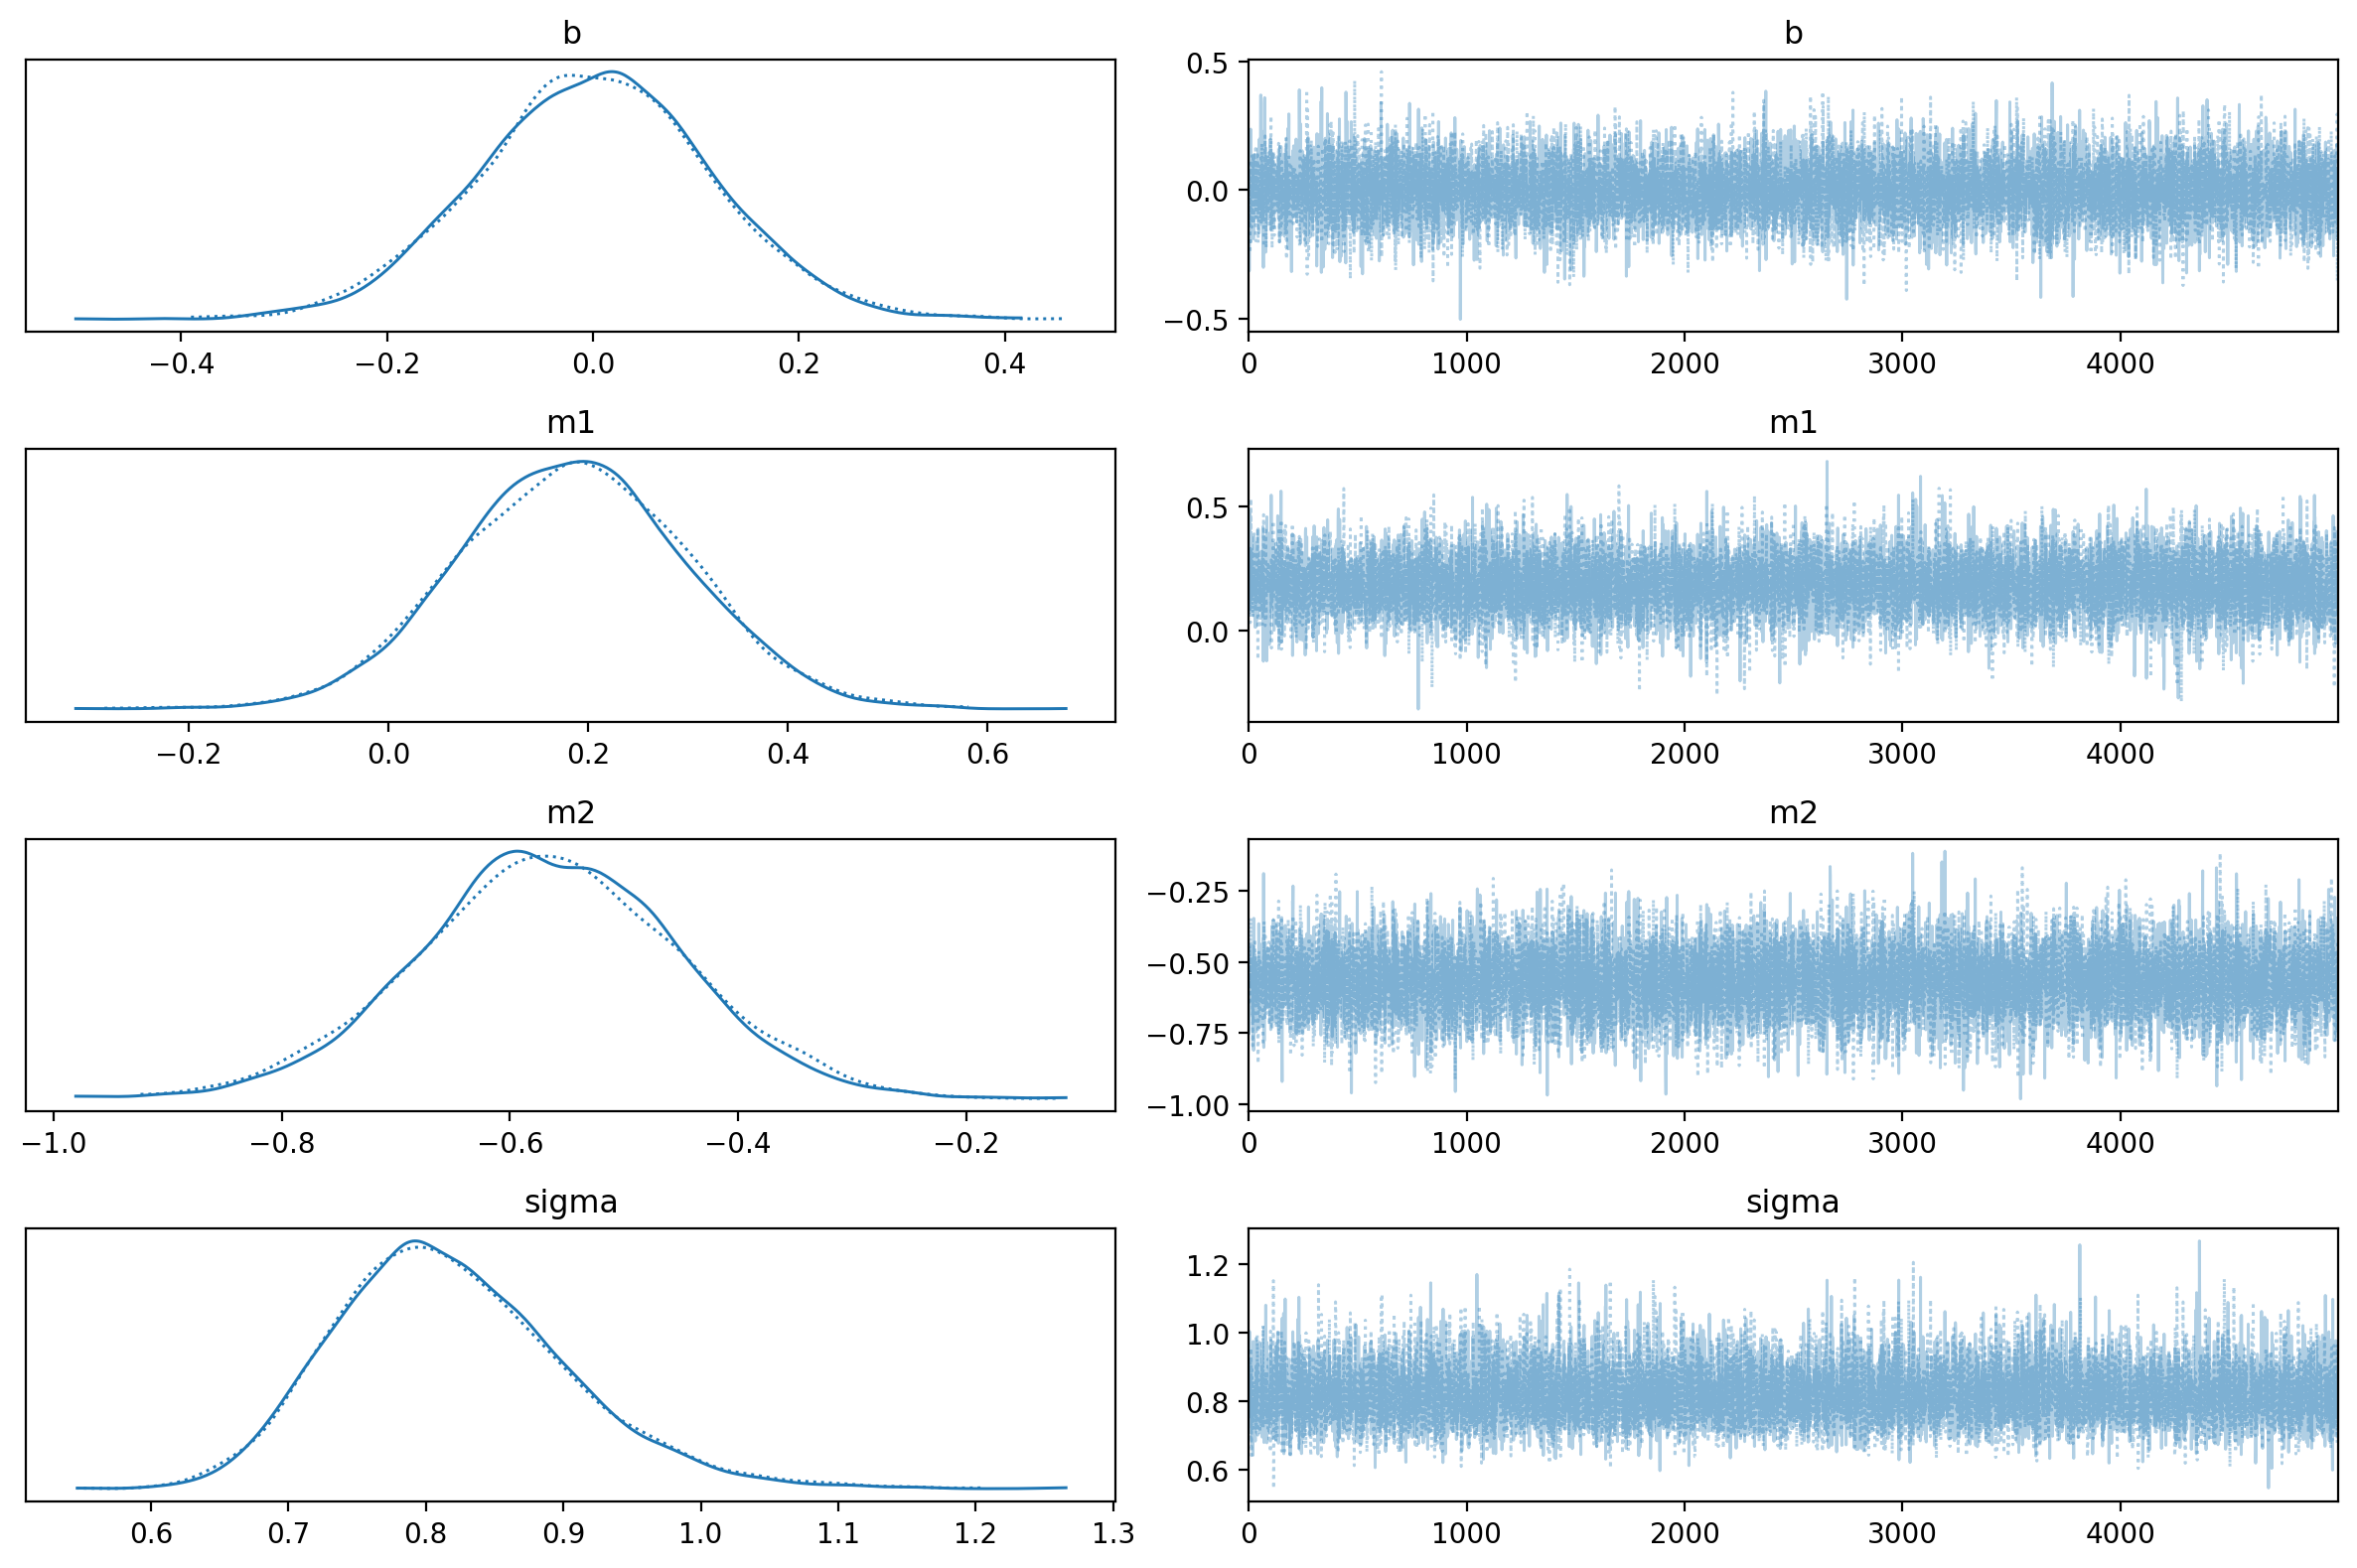

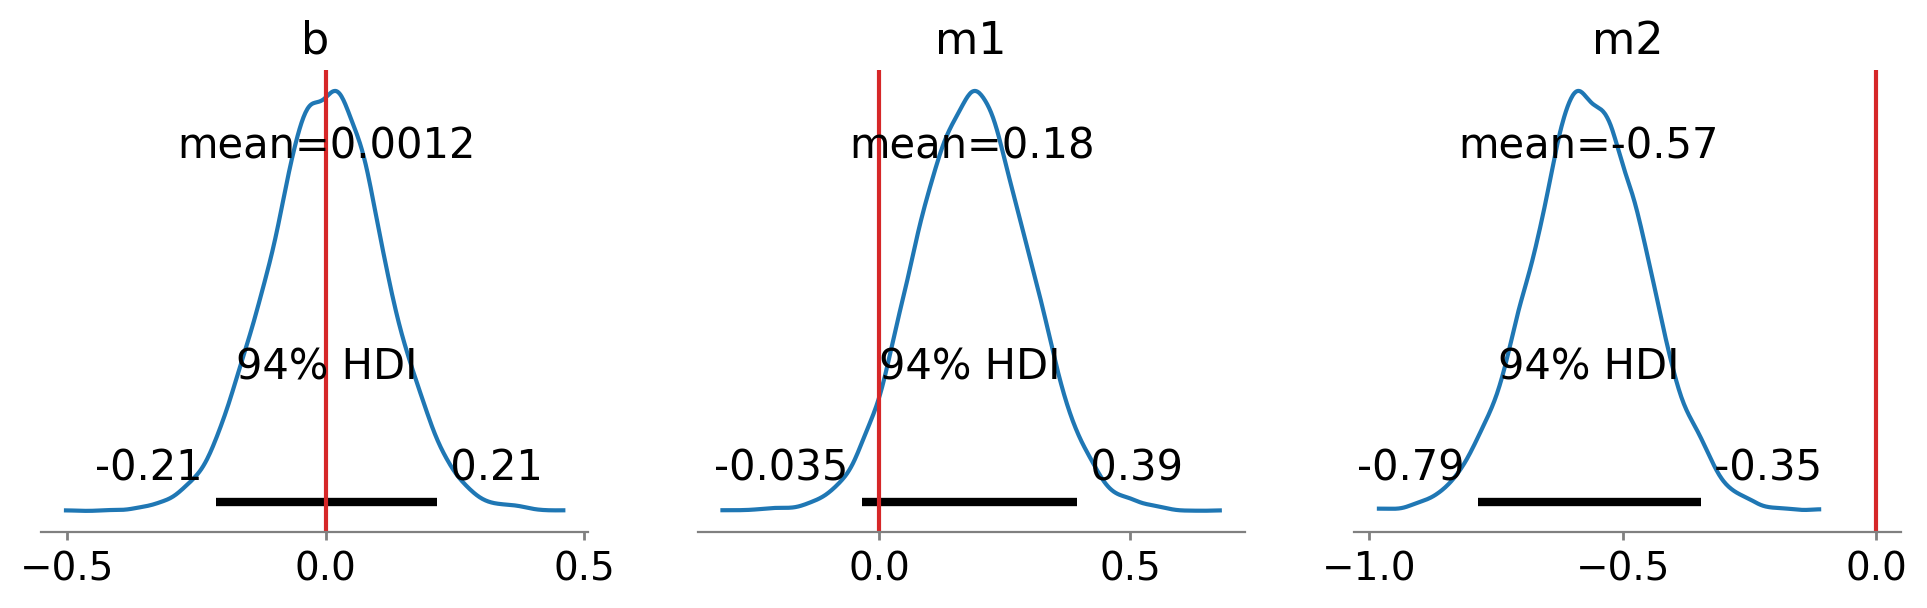

In [60]:
az.plot_trace(trace_model3, var_names='~mu')
plt.tight_layout()

fig, axes = plt.subplots(figsize=(12, 3), ncols=3)
az.plot_posterior(trace_model3, var_names="~mu", ax=axes)

[ax.axvline(0, color="tab:red") for ax in axes];

# Self-Directed Practical (and homework)

* In-person: Get into groups of 2-4 and do the following.
* Virtual: Work by yourselves or in breakout rooms you can join if you wish.

Using the `milk` dataset:

1. Create hypotheses.
2. Run a single-variable regression using `linear_model.LinearRegression`.
    * CLEARLY state in a markdown cell what the specific hypothesis you're testing.
3. Run a multiple-variable regression with TWO variables using `linear_model.LinearRegression`.
    * Do some work to answer the question - are my predicting variables correlated at all?
4. Run a ridge, lasso, or elasticnet multiple-variable regression using the exact same two variables above. How did your coefficients change compared to your non-regularized regression in (2)?

5. Finally, run a Bayesian linear regression. Collect all of your figures into one Powerpoint presentation, and submit it as homework. Only one Powerpoint needs to be submitted per group. Single Variable.

Python Notebook and PPT.

In [61]:
milk = pd.read_json(
    '{"clade":{"0":"Strepsirrhine","1":"Strepsirrhine","2":"Strepsirrhine","3":"Strepsirrhine","4":"Strepsirrhine","5":"New World Monkey","6":"New World Monkey","7":"New World Monkey","8":"New World Monkey","9":"New World Monkey","10":"New World Monkey","11":"New World Monkey","12":"New World Monkey","13":"New World Monkey","14":"Old World Monkey","15":"Old World Monkey","16":"Old World Monkey","17":"Old World Monkey","18":"Old World Monkey","19":"Old World Monkey","20":"Ape","21":"Ape","22":"Ape","23":"Ape","24":"Ape","25":"Ape","26":"Ape","27":"Ape","28":"Ape"},"species":{"0":"Eulemur fulvus","1":"E macaco","2":"E mongoz","3":"E rubriventer","4":"Lemur catta","5":"Alouatta seniculus","6":"A palliata","7":"Cebus apella","8":"Saimiri boliviensis","9":"S sciureus","10":"Cebuella pygmaea","11":"Callimico goeldii","12":"Callithrix jacchus","13":"Leontopithecus rosalia","14":"Chlorocebus pygerythrus","15":"Miopithecus talpoin","16":"M fuscata","17":"M mulatta","18":"M sinica","19":"Papio spp","20":"Nomascus concolor","21":"Hylobates lar","22":"Symphalangus syndactylus","23":"Pongo pygmaeus","24":"Gorilla gorilla gorilla","25":"G gorilla beringei","26":"Pan paniscus","27":"P troglodytes","28":"Homo sapiens"},"kcal.per.g":{"0":0.49,"1":0.51,"2":0.46,"3":0.48,"4":0.6,"5":0.47,"6":0.56,"7":0.89,"8":0.91,"9":0.92,"10":0.8,"11":0.46,"12":0.71,"13":0.71,"14":0.73,"15":0.68,"16":0.72,"17":0.97,"18":0.79,"19":0.84,"20":0.48,"21":0.62,"22":0.51,"23":0.54,"24":0.49,"25":0.53,"26":0.48,"27":0.55,"28":0.71},"perc.fat":{"0":16.6,"1":19.27,"2":14.11,"3":14.91,"4":27.28,"5":21.22,"6":29.66,"7":53.41,"8":46.08,"9":50.58,"10":41.35,"11":3.93,"12":38.38,"13":36.9,"14":39.17,"15":40.15,"16":53.05,"17":55.51,"18":48.9,"19":54.31,"20":15.96,"21":34.51,"22":26.42,"23":37.78,"24":27.18,"25":30.59,"26":21.18,"27":36.84,"28":50.49},"perc.protein":{"0":15.42,"1":16.91,"2":16.85,"3":13.18,"4":19.5,"5":23.58,"6":23.46,"7":15.8,"8":23.34,"9":22.33,"10":20.85,"11":25.3,"12":20.09,"13":21.27,"14":14.65,"15":18.08,"16":13.0,"17":13.17,"18":13.91,"19":10.97,"20":12.52,"21":12.57,"22":13.46,"23":7.37,"24":16.29,"25":20.77,"26":11.68,"27":9.54,"28":9.84},"perc.lactose":{"0":67.98,"1":63.82,"2":69.04,"3":71.91,"4":53.22,"5":55.2,"6":46.88,"7":30.79,"8":30.58,"9":27.09,"10":37.8,"11":70.77,"12":41.53,"13":41.83,"14":46.18,"15":41.77,"16":33.95,"17":31.32,"18":37.19,"19":34.72,"20":71.52,"21":52.92,"22":60.12,"23":54.85,"24":56.53,"25":48.64,"26":67.14,"27":53.62,"28":39.67},"mass":{"0":1.95,"1":2.09,"2":2.51,"3":1.62,"4":2.19,"5":5.25,"6":5.37,"7":2.51,"8":0.71,"9":0.68,"10":0.12,"11":0.47,"12":0.32,"13":0.6,"14":3.47,"15":1.55,"16":7.08,"17":3.24,"18":7.94,"19":12.3,"20":7.59,"21":5.37,"22":10.72,"23":35.48,"24":79.43,"25":97.72,"26":40.74,"27":33.11,"28":54.95},"neocortex.perc":{"0":55.16,"1":null,"2":null,"3":null,"4":null,"5":64.54,"6":64.54,"7":67.64,"8":null,"9":68.85,"10":58.85,"11":61.69,"12":60.32,"13":null,"14":null,"15":69.97,"16":null,"17":70.41,"18":null,"19":73.4,"20":null,"21":67.53,"22":null,"23":71.26,"24":72.6,"25":null,"26":70.24,"27":76.3,"28":75.49}}'
)

milk.head()

<ipython-input-61-e67ed06b9706>:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  milk = pd.read_json(


clade         species  kcal.per.g  perc.fat  perc.protein  \
0  Strepsirrhine  Eulemur fulvus        0.49     16.60         15.42   
1  Strepsirrhine        E macaco        0.51     19.27         16.91   
2  Strepsirrhine        E mongoz        0.46     14.11         16.85   
3  Strepsirrhine   E rubriventer        0.48     14.91         13.18   
4  Strepsirrhine     Lemur catta        0.60     27.28         19.50   

   perc.lactose  mass  neocortex.perc  
0         67.98  1.95           55.16  
1         63.82  2.09             NaN  
2         69.04  2.51             NaN  
3         71.91  1.62             NaN  
4         53.22  2.19             NaN

The `milk` dataset includes data about certain species of monkies and their milk composition, average weight, and percentage of the brain that is neocortex.

* `clade` - group of monkey
* `kcal.per.g` - kcals per gram for each of the mammal's milk
* `perc.fat`, `perc.protein`, `perc.lactose` - percentage of those nutrients in the milk
* `mass` - mass of average female in that species
* `neocortex.perc` - percentage of mass of brain taken up by neocortex (the smart part)

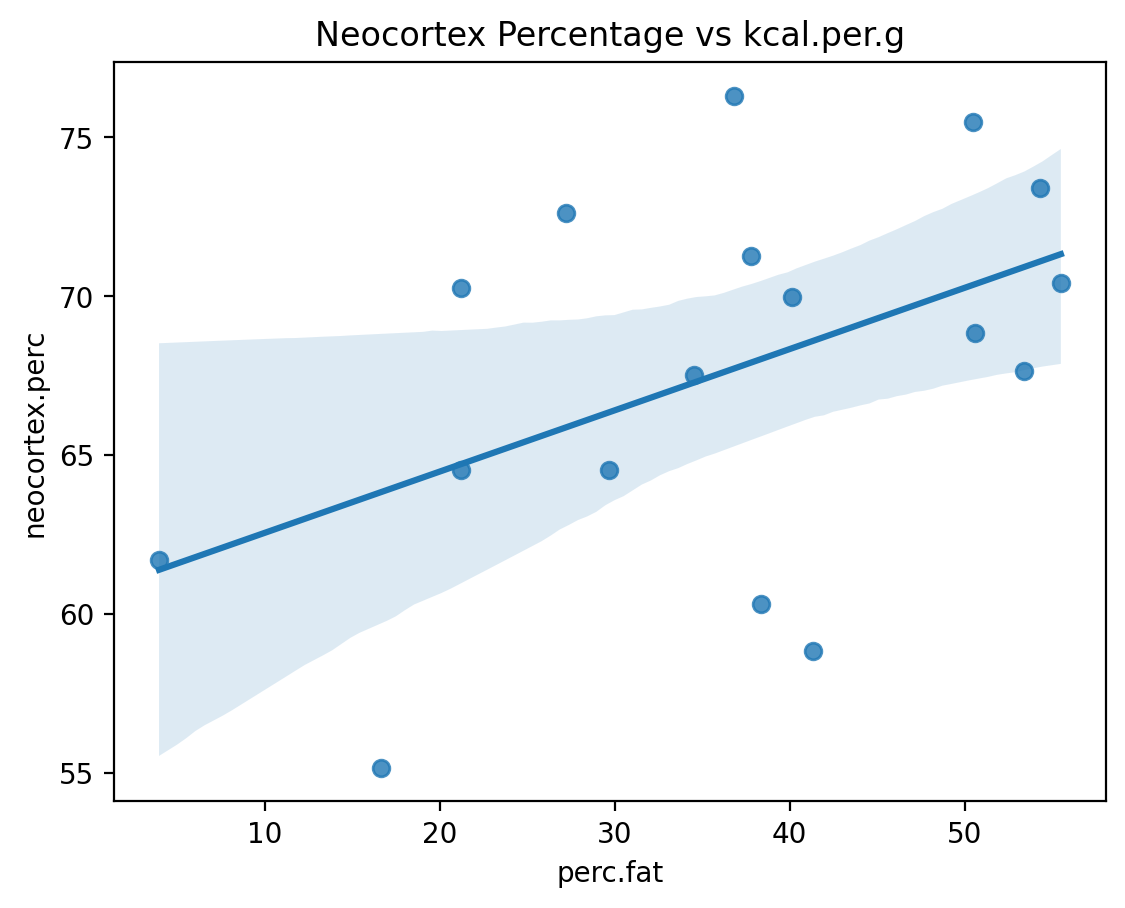

Regression equation: neocortex.perc = 64.04661009445103 + 5.366514167650528 * perc.fat
R-squared: 0.024167050336373674


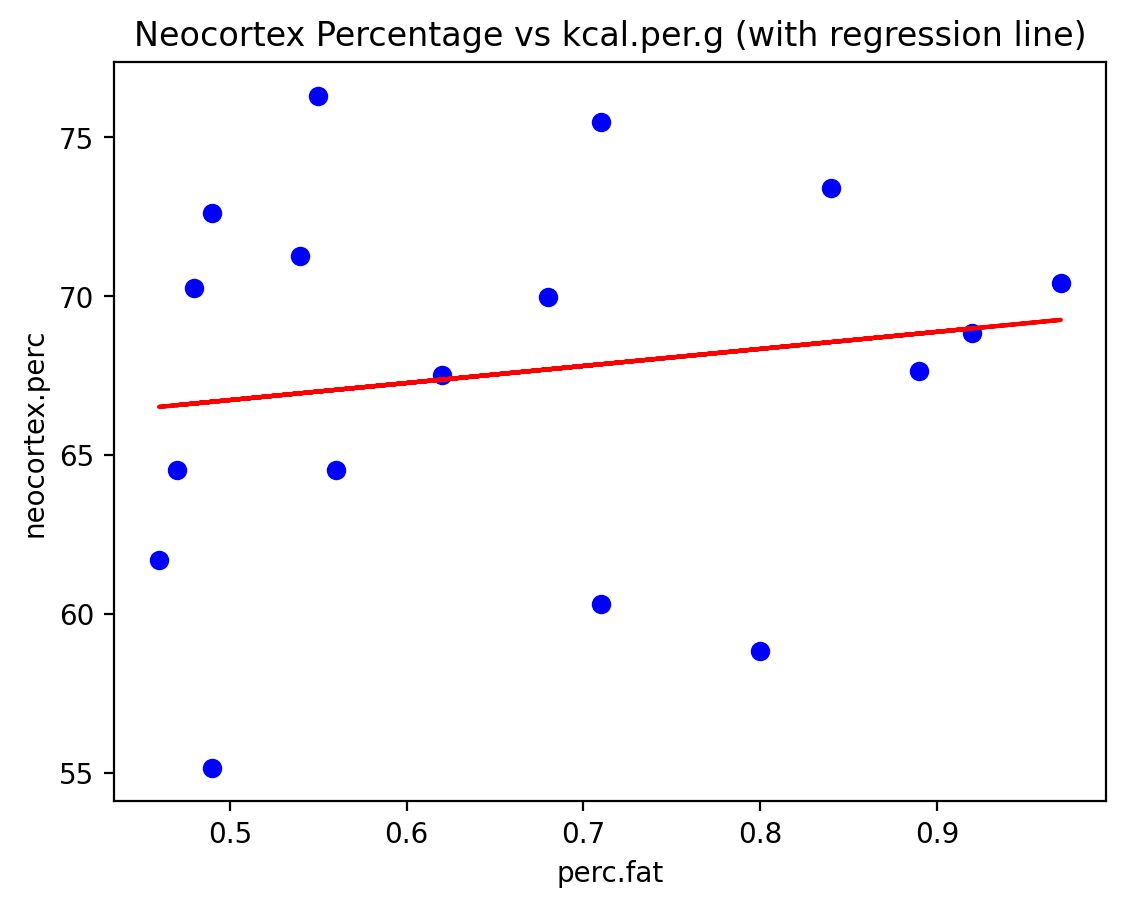

In [62]:
# Hypothesis: If monkeys eat high fat diets, then they will have a larger neocortex percentage in the brain.
!pip install matplotlib seaborn scikit-learn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows with missing neocortex.perc values
milk_clean = milk.dropna(subset=['neocortex.perc'])

# Plot for per.fat vs neocortex.perc
sns.regplot(x='perc.fat', y='neocortex.perc', data=milk_clean)
plt.title('Neocortex Percentage vs kcal.per.g')
plt.show()

# Perform simple linear regression using sklearn
X = milk_clean[['kcal.per.g']]
y = milk_clean['neocortex.perc']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Compute R-Squared
r_squared = model.score(X, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Regression equation: neocortex.perc = {intercept} + {slope} * perc.fat")
print(f"R-squared: {r_squared}")

# Predict values for the regression line (for plotting)
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red")
plt.title('Neocortex Percentage vs kcal.per.g (with regression line)')
plt.xlabel('perc.fat')
plt.ylabel('neocortex.perc')
plt.show()


                kcal.per.g  perc.fat  perc.protein  perc.lactose      mass  \
kcal.per.g        1.000000  0.882278     -0.057562     -0.931304 -0.359630   
perc.fat          0.882278  1.000000     -0.382816     -0.924695 -0.046460   
perc.protein     -0.057562 -0.382816      1.000000      0.002281 -0.511829   
perc.lactose     -0.931304 -0.924695      0.002281      1.000000  0.261215   
mass             -0.359630 -0.046460     -0.511829      0.261215  1.000000   
neocortex.perc    0.155458  0.474381     -0.628972     -0.254297  0.614892   

                neocortex.perc  
kcal.per.g            0.155458  
perc.fat              0.474381  
perc.protein         -0.628972  
perc.lactose         -0.254297  
mass                  0.614892  
neocortex.perc        1.000000  


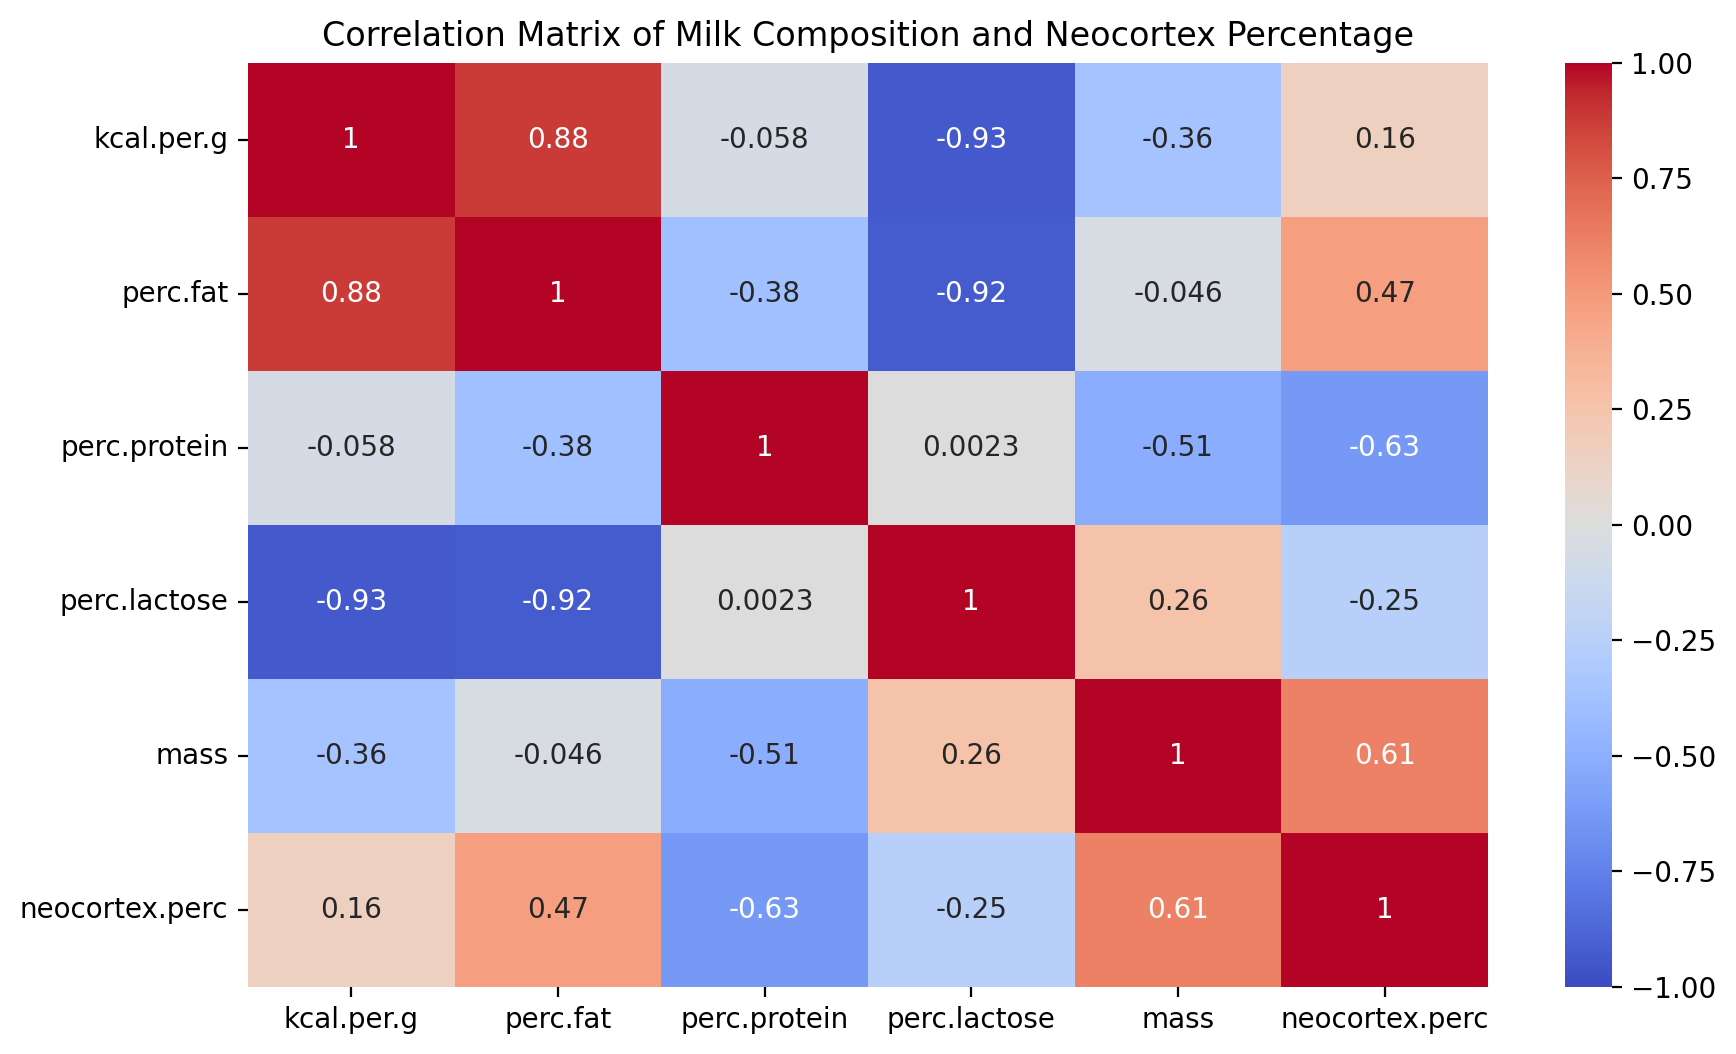

Regression equation: neocortex.perc = 98.79223963839875 + -21.172145405573566 * kcal.per.g + -0.3626705423504972 * perc.lactose
MLR coefficients:[-21.17214541  -0.36267054]
R-squared: 0.11457249228504363


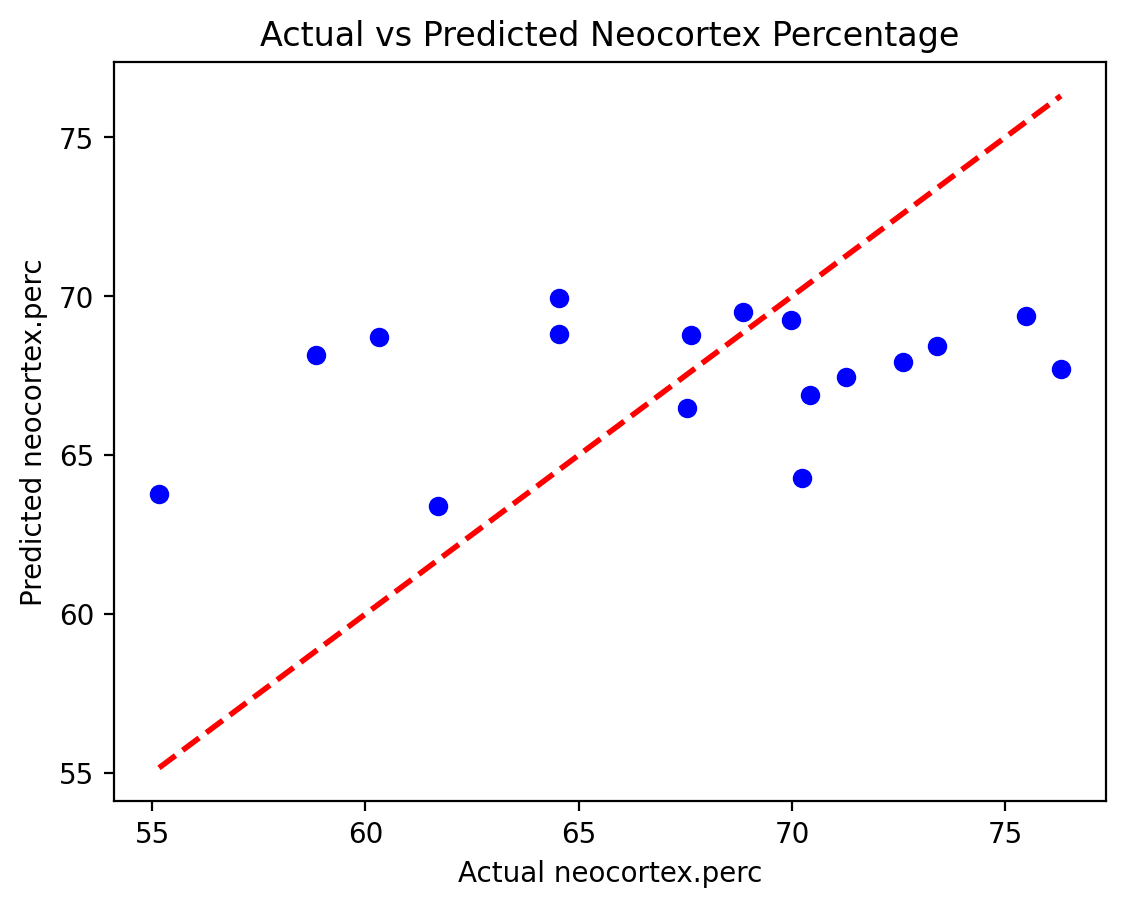

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing neocortex.perc values
milk_clean = milk.dropna(subset=['neocortex.perc'])

# Select numeric columns for correlation matrix
numeric_cols = ['kcal.per.g', 'perc.fat', 'perc.protein', 'perc.lactose', 'mass', 'neocortex.perc']

# Compute the correlation matrix
correlation_matrix = milk_clean[numeric_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Milk Composition and Neocortex Percentage')
plt.show()

# kcal.per.g and perc.lactose are the least correlated with neocotrex.perc so I will run the MLR with these 2.

# Select the independent variables (least correlated)
X = milk_clean[['kcal.per.g', 'perc.lactose']]  # Independent variables
y = milk_clean['neocortex.perc']  # Dependent variable

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

# Print the regression equation and coefficients
print(f"Regression equation: neocortex.perc = {intercept} + {coefficients[0]} * kcal.per.g + {coefficients[1]} * perc.lactose")
print(f"MLR coefficients:{coefficients}")

# Compute R-squared for the model
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

# Predict values for the regression model (for plotting)
y_pred = model.predict(X)

# Plot actual vs predicted values for visualization
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Neocortex Percentage')
plt.xlabel('Actual neocortex.perc')
plt.ylabel('Predicted neocortex.perc')
plt.show()

Ridge Regression R-squared: 0.07043877800492881
Ridge Coefficients: [-1.26195961 -0.12663865]
Lasso Regression R-squared: 0.0646651506397301
Lasso Coefficients: [-0.         -0.11114824]
ElasticNet Regression R-squared: 0.06712424047628818
ElasticNet Coefficients: [-0.52795889 -0.11765995]


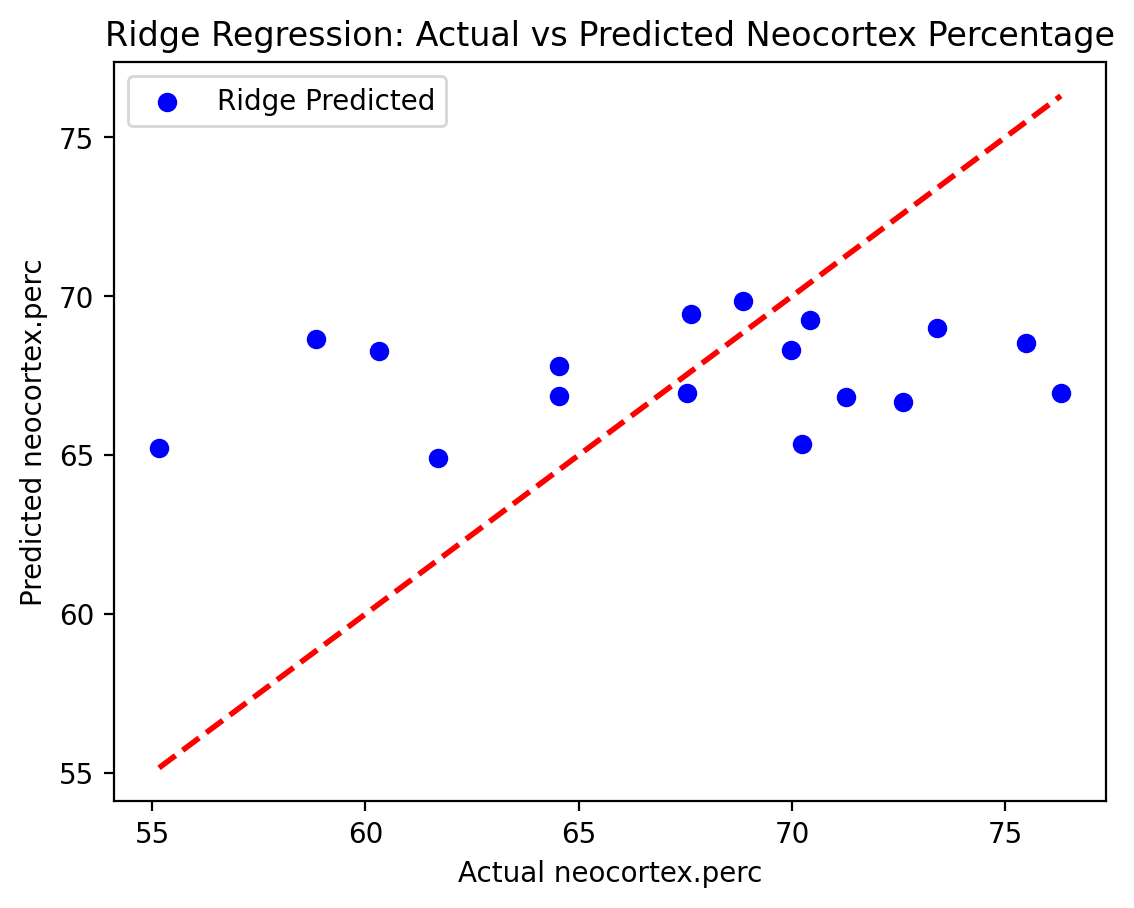

In [64]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X, y)
ridge_pred = ridge_model.predict(X)
ridge_r2 = r2_score(y, ridge_pred)
print(f"Ridge Regression R-squared: {ridge_r2}")
print(f"Ridge Coefficients: {ridge_model.coef_}")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization
lasso_model.fit(X, y)
lasso_pred = lasso_model.predict(X)
lasso_r2 = r2_score(y, lasso_pred)
print(f"Lasso Regression R-squared: {lasso_r2}")
print(f"Lasso Coefficients: {lasso_model.coef_}")

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio
elasticnet_model.fit(X, y)
elasticnet_pred = elasticnet_model.predict(X)
elasticnet_r2 = r2_score(y, elasticnet_pred)
print(f"ElasticNet Regression R-squared: {elasticnet_r2}")
print(f"ElasticNet Coefficients: {elasticnet_model.coef_}")

# Plot Actual vs Predicted for Ridge
plt.scatter(y, ridge_pred, color='blue', label='Ridge Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2)
plt.title('Ridge Regression: Actual vs Predicted Neocortex Percentage')
plt.xlabel('Actual neocortex.perc')
plt.ylabel('Predicted neocortex.perc')
plt.legend()
plt.show()

# Both coefficents became smaller when calculated during Ridge, Lasso, and ElasticNet

Output()

Output()

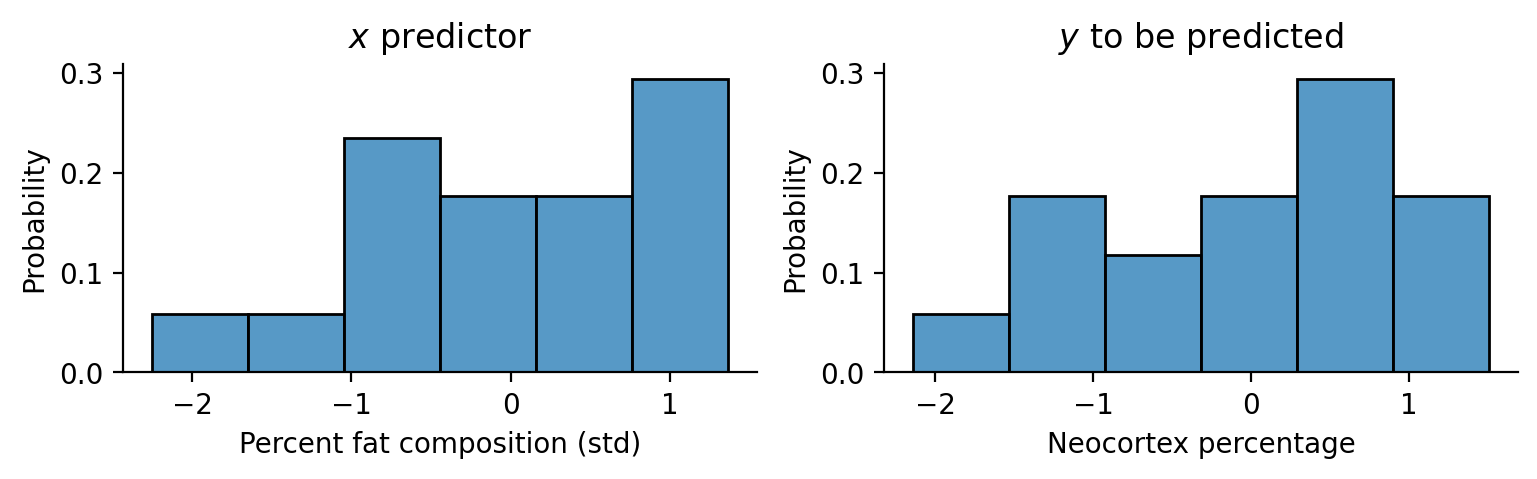

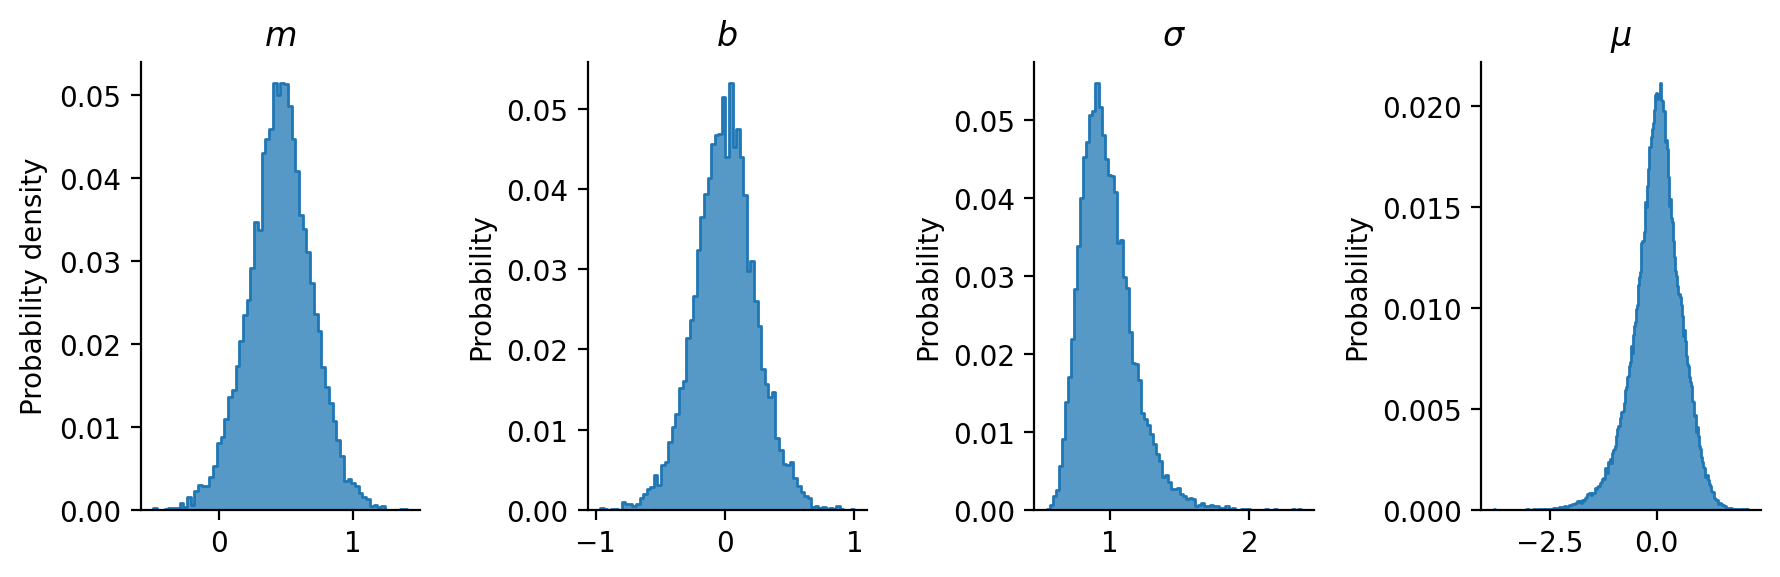

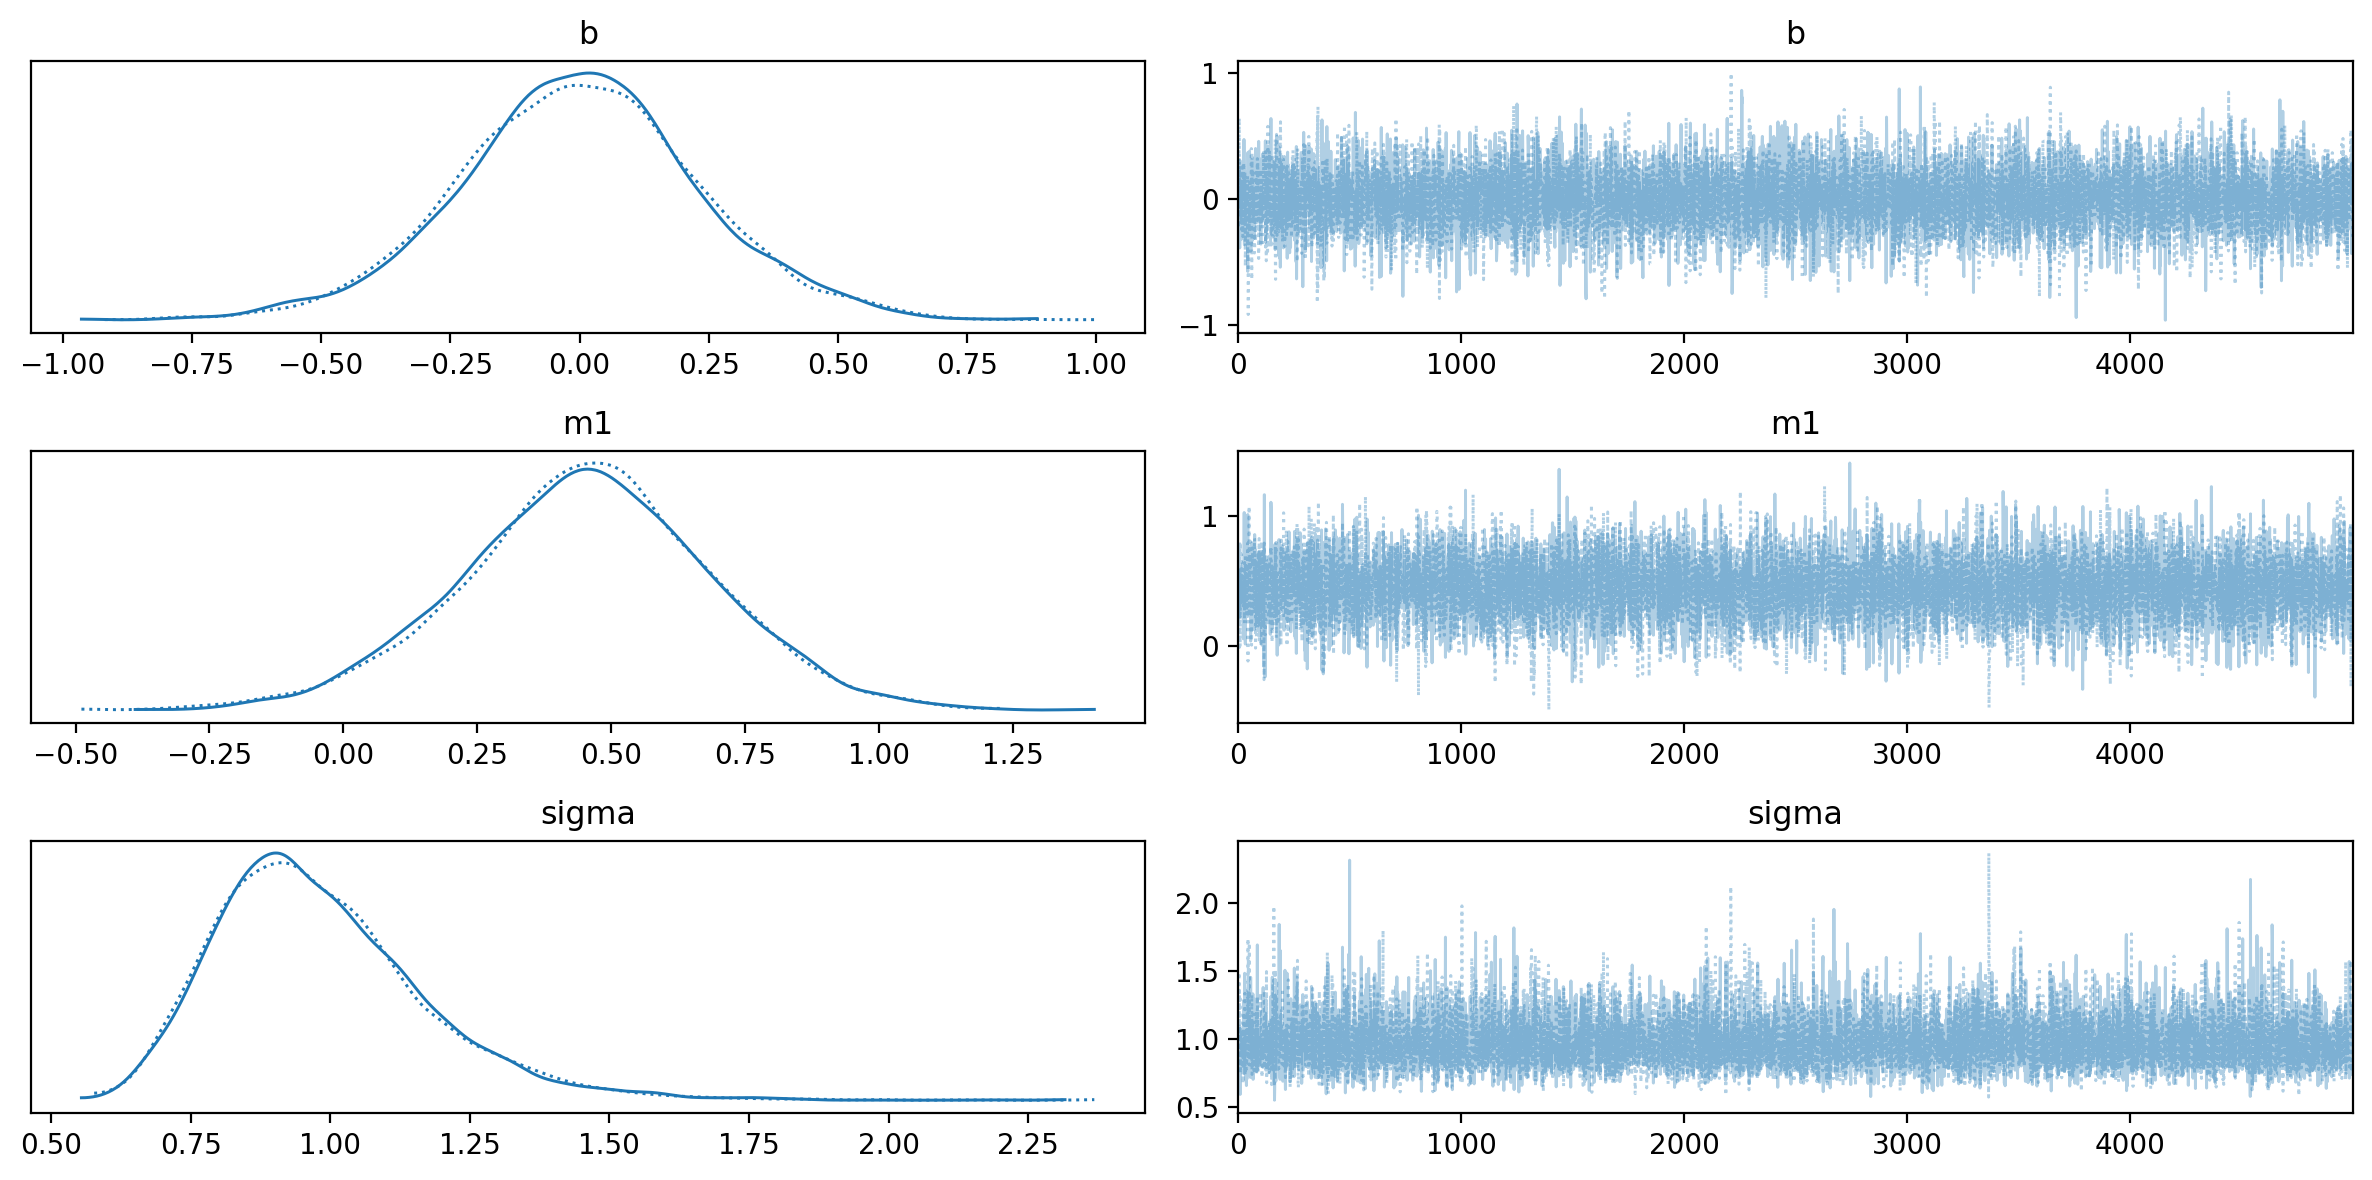

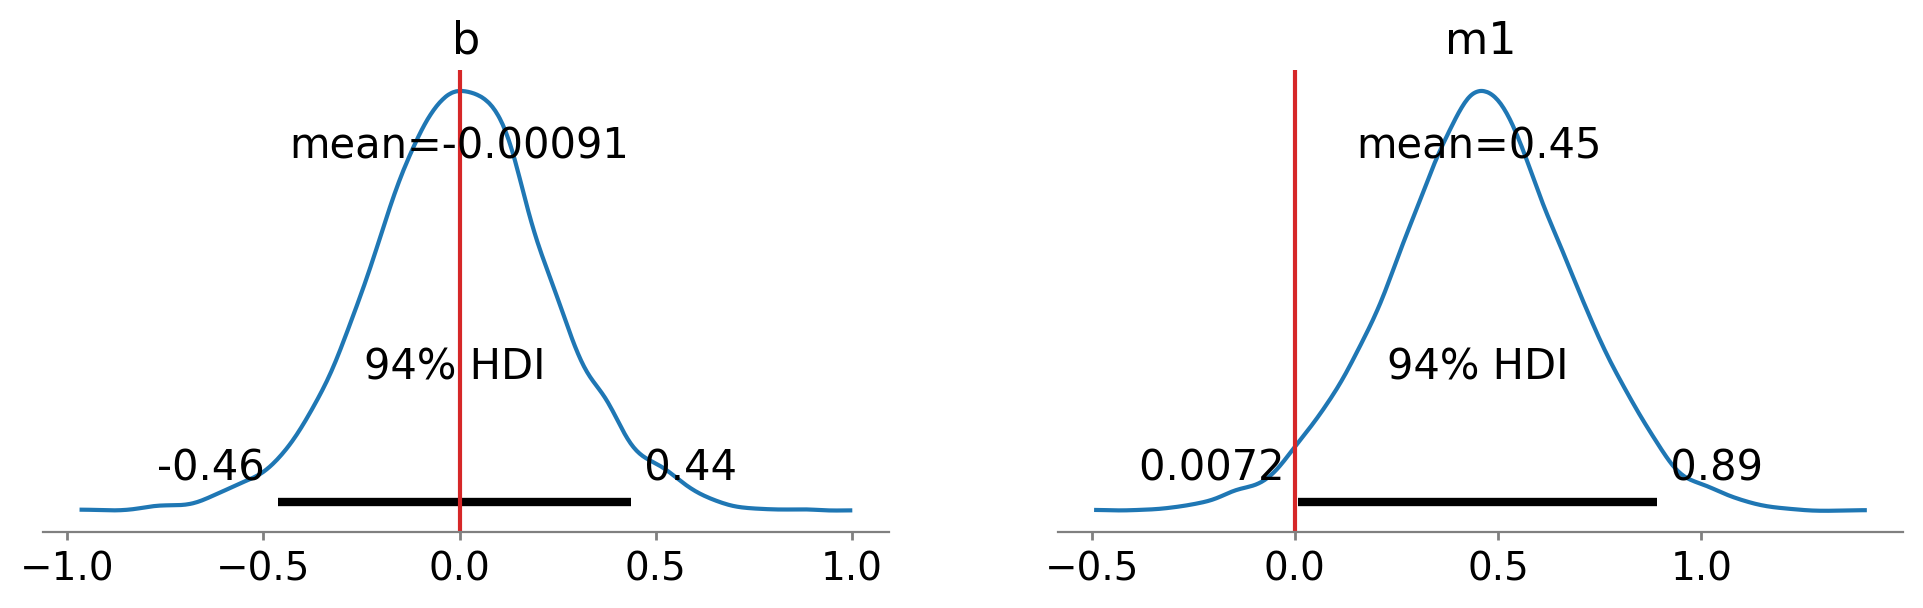

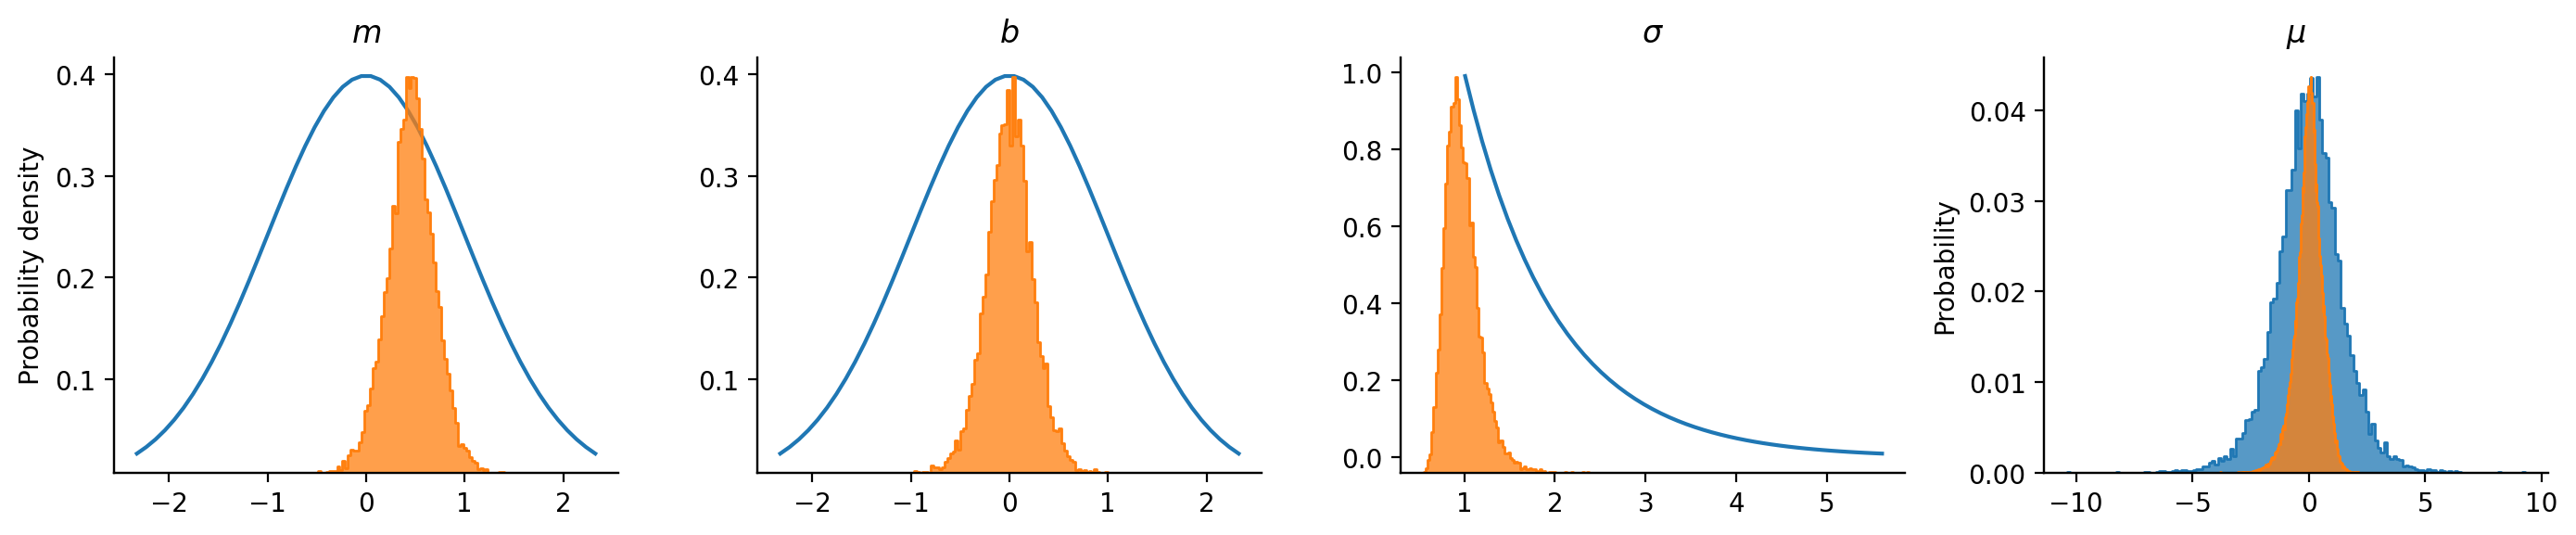

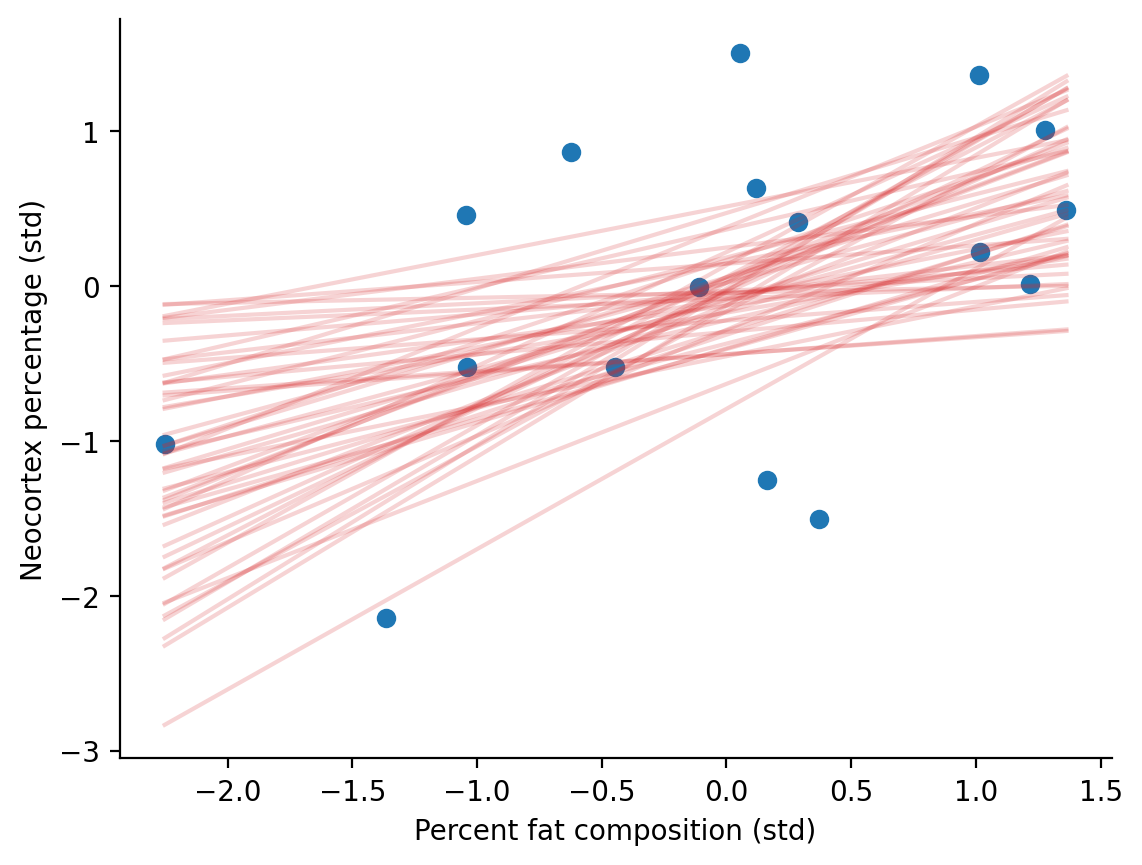

In [65]:
!pip install pymc
import pymc as pm

# Data extraction

x_raw = milk_clean["perc.fat"].values
x_norm = (x_raw - np.mean(x_raw)) / np.std(x_raw)

y_raw = milk_clean["neocortex.perc"].values
y_norm = (y_raw - np.mean(y_raw)) / np.std(y_raw)

# Variable vizualization

fig, axes = plt.subplots(figsize=(9, 2), ncols=2)
axes = axes.reshape(-1)

sns.histplot(x_norm, ax=axes[0], stat="probability")
sns.histplot(y_norm, ax=axes[1], stat="probability")

axes[0].set_xlabel("Percent fat composition (std)")
axes[1].set_xlabel("Neocortex percentage")
axes[0].set_title("$x$ predictor")
axes[1].set_title("$y$ to be predicted")

sns.despine()

# Build the model

with pm.Model() as model:

    # Define random variable priors
    m1 = pm.Normal("m1", 0, 1)
    b = pm.Normal("b", 0, 1)

    sigma = pm.Exponential("sigma", 1)

    # Define your likelihood function
    u = pm.Deterministic("mu", m1 * x_norm + b)
    obs = pm.Normal("y", u, sigma, observed=y_norm)

    # Run MCMC sampling
    trace_model2 = pm.sample(return_inferencedata=True, draws=5000, tune=1000, chains=2, cores=1)

fig, axes = plt.subplots(figsize=(9,3), ncols=4)

sns.histplot(trace_model2.posterior['m1'].values.reshape(-1), ax=axes[0], stat='probability', element='step') # Access m1 instead of m
sns.histplot(trace_model2.posterior['b'].values.reshape(-1), ax=axes[1], stat='probability', element='step')
sns.histplot(trace_model2.posterior['sigma'].values.reshape(-1), ax=axes[2], stat='probability', element='step')

sns.histplot(trace_model2.posterior['mu'].values.reshape(-1), ax=axes[3], stat='probability', element='step')

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[3].set_title("$\mu$")

axes[0].set_ylabel('Probability density')

sns.despine()
plt.tight_layout()
az.plot_trace(trace_model2, var_names='~mu')
plt.tight_layout()

fig, axes = plt.subplots(figsize=(12, 3), ncols=2)
az.plot_posterior(trace_model2, var_names="~mu", ax=axes)

[ax.axvline(0, color="tab:red") for ax in axes];

# Prior Plots

# our prior for m, b
norm = stats.norm(loc=0, scale=1)
mb_x_range = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 50)
mb_y = norm.pdf(mb_x_range)

# our prior for sigma
exp = stats.expon(1)
sig_x_range = np.linspace(exp.ppf(0.01), exp.ppf(0.99), 50)
sig_y = exp.pdf(sig_x_range)

# simulating our prior for mu
rng = np.random.default_rng(11206)
mus = []
for i in range(1000):
    m = rng.normal(loc=0, scale=1)
    b = rng.normal(loc=0, scale=1)
    sig = rng.exponential(1)

    mus.extend([m * each_x + b for each_x in x_norm])
fig, axes = plt.subplots(figsize=(3.5*4, 3), ncols=4)

axes[0].plot(mb_x_range, mb_y)
axes[1].plot(mb_x_range, mb_y)
axes[2].plot(sig_x_range, sig_y)

sns.histplot(
    mus,
    ax=axes[3],
    stat="probability",
    element="step",
    color="tab:blue",
)

ax_twins = [ax.twinx() for ax in axes]
[ax.set_yticks([]) for ax in ax_twins]  # list comp to apply function across twin axes

# Posterier Plots

sns.histplot(
    trace_model2.posterior["m1"].values.reshape(-1),
    ax=ax_twins[0],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model2.posterior["b"].values.reshape(-1),
    ax=ax_twins[1],
    stat="probability",
    element="step",
    color="tab:orange",
)

sns.histplot(
    trace_model2.posterior["sigma"].values.reshape(-1),
    ax=ax_twins[2],
    stat="probability",
    element="step",
    color="tab:orange",
)
sns.histplot(
    trace_model2.posterior["mu"].values.reshape(-1),
    ax=ax_twins[3],
    stat="probability",
    element="step",
    color="tab:orange",
)

axes[0].set_title("$m$")
axes[1].set_title("$b$")
axes[2].set_title("$\sigma$")
axes[3].set_title("$\mu$")
axes[0].set_ylabel("Probability density")


sns.despine()
plt.tight_layout()

# need an x_range for our prediction lines
x_range = np.linspace(min(x_norm), max(x_norm), 100)

# choose 50 random iterations to plot from
rng = np.random.default_rng(77777)
selection = rng.integers(low=0, high=len(trace_model2.posterior["m1"].values.reshape(-1)), size=50)

# linearize our posterior arrays
ms = trace_model2.posterior['m1'].values.reshape(-1)
bs = trace_model2.posterior['b'].values.reshape(-1)

fig, ax = plt.subplots()
ax.scatter(x_norm, y_norm)

for i in selection:

    m = ms[i]
    b = bs[i]

    y_pred = m * x_range + b
    ax.plot(x_range, y_pred, color="tab:red", alpha=0.2)

ax.set_xlabel('Percent fat composition (std)')
ax.set_ylabel('Neocortex percentage (std)')
sns.despine()